# Web Scraping 


In [3]:
!apt-get update
!apt install chromium-chromedriver
!pip install selenium

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:13 http://ppa.lau

In [4]:
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import numpy as np

# Bibliotecas do selenium para pegar dados.
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


# Gráfico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
import matplotlib.patheffects as path_effects

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:

# -------------- Função para coleta dos links das vagas.

def coleta(l):
  """
  Modelo vai receber find_elements(By.TAG_NAME, 'a') da página em acesso no momento, com todas as tags
  "a" selecionadas, será separado o atributo "href" que é o link para acessar a vaga de emprego, como todos esse links
  tem mais de 200 caracters, faz-se uma condicional para poder selecionar somente os links.
  """

  lista = []
  for i in lk:
    try:
      url = i.get_attribute('href')
      if len(url) > 200:
            lista.append(url)
    except:
      continue

  return list(set(lista))



# -------------- Criação do drive para acessar o site.

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(chrome_options=chrome_options)
urls = 'https://www.glassdoor.com.br/Vaga/brasil-cientista-de-dados-vagas-SRCH_IL.0,6_IN36_KO7,25.htm?fromAge=14'
driver.get(urls) # Criação do driver.



# -------------- Coleta de dados.


  # Identificar a quantidade de  páginas com ofertas de emprego:
i = driver.find_element(By.CLASS_NAME,'pageContainer').get_attribute('innerHTML')
button = len(BeautifulSoup(i, 'html.parser').find_all('button'))

  # Listas para armazenar os links.
listas = []

for i in range(2,button,1): # botão 1 para voltar, botão 2 da primeira página, por isso começa a partir do 2.
  # Recolher as informações da primeira página localizando pela tag "a" e aplicando na função.
  if i == 2:
    print('Rodada > ',i-1)
    lk = driver.find_elements(By.TAG_NAME, 'a')
    links = coleta(lk)
    print(len(links))
    listas.extend(links) # A função trás os itens em lista, aqui faz a junção das duas.
  else:
    # Aqui é feito o click em cada página nova e recolhido os dados.
    print('Rodada > ',i-1)
    driver.find_element(By.XPATH, f'//*[@id="MainCol"]/div[2]/div/div[1]/button[{i}]').click()
    time.sleep(5) # Para dar tempo da página carregar as informações.
    lk = driver.find_elements(By.TAG_NAME, 'a')
    links = coleta(lk)
    print(len(links))
    listas.extend(links)
    driver.get(urls) # Para evitar o erro do site.

driver.quit() # Fechar o driver.


In [ ]:
def head_f(x):

  p = re.compile(r'(\n)(.*)(\n)')
  r = p.finditer(x)
  lista = list()
  for i in r:
    lista.append(i.group(2))
  return lista

def outros_elementos(dt):
  """
  Função para coletar os dados (caso exista) no link de cada oferta de trabalho.
  dt = Dataset que está sendo salva as informações:
   
  """
  # ------ Parte 1 - Clicando no botão: Empresa
  try: # Caso exista esse botão o código irá rodar e coletar os dados.
    driver_1.find_element(By.XPATH, '//*[@id="PageBodyContents"]/div[2]/header/div/div/div[2]').click() # Clicar no box 
    elementos = driver_1.find_element(By.XPATH,'//*[@id="InfoFields"]').get_attribute('innerHTML') # Coletar dados da caixa
    sopa = BeautifulSoup(elementos, 'html.parser') 
    Titulo = sopa.find_all('label')
    Resposta = sopa.find_all('span')
    for t, r in zip(Titulo, Resposta):
      dt[t.text] = r.text

    try:
      # Coletar dados de avaliação da empresa
      driver_1.find_element(By.XPATH, '//*[@id="PageBodyContents"]/div[2]/header/div/div/div[3]').click() # Clickar no box
      elementos = driver_1.find_element(By.XPATH, '//*[@id="PageBodyContents"]/div[2]/div/div/div/ul').get_attribute('innerHTML') 
      sopa = BeautifulSoup(elementos, 'html.parser').find_all('span',{'class':'e121l59f1'}) # Caixa
      for i in range(0,len(sopa),2):
        dt[sopa[i].text] = sopa[i+1].text # Coletando elementos da caixa
      
      page = driver_1.page_source # Coletar todos os elementos da pag
      ele = BeautifulSoup(page, 'html.parser').find('div',{'class':'d-flex flex-column align-items-center top'}) 
      titulo = ele.find('div',{'class':'css-3jq91s e1qhxspr5'}).text
      resposta = ele.find('g').find('text').text
      dt[titulo] = resposta

    except:
      print('Failed 2')

    return dt
  except: # Caso contrário irá retornar com os dados sem qualquer alteração. 
    return dt

In [ ]:
driver_1 = webdriver.Chrome(chrome_options=chrome_options)
dados = list()
for i in range(len(listas)):
  driver_1.get(listas[i])
  # ----------- Localizar Nome da empresa e nota
  soup = BeautifulSoup(driver_1.page_source, 'html.parser')
  head = soup.find_all('div',{'class':'e11nt52q0'})
  head = head[0].find('div',{'class':'e11nt52q1'}).prettify()
  head = head_f(head)
  anuncio = soup.find('div', {'class':"e11nt52q6"}).text
  local = soup.find('div', {'class':"e11nt52q2"}).text
  if len(head) > 2:
    data = {'Empresa':head[0], 'Vaga':anuncio, 'Local':local,'Nota':head[1], 'Link':listas[i]}
  else:
    data = {'Empresa':head[0], 'Vaga':anuncio, 'Local':local, 'Link':listas[i]}

  print(f'Coletando dados da empresa: {data["Empresa"]}')
  

  # ----------- Localizar Descrição da vaga.
  body = soup.find_all('div',{'class':'e1eh6fgm1'})
  data['Descrição'] = body[0].find_all('div',{'id':"JobDescriptionContainer"})[0].text

  # ----------- Pegando elementos de outras páginas.
  data = outros_elementos(data)

  dados.append(data)

driver_1.quit()


In [ ]:
dataset = pd.DataFrame(dados)
dataset.to_csv('/content/drive/MyDrive/Colab Assuntos Exemplos/base_de_dados_completo.csv', index=False)

## Análise Inicial dos dados
- Tamanho
- Features
- Dados repetidos
- Dados vazios



In [ ]:
dataset.head()

,Empresa,Vaga,Local,Nota,Link,Descrição,Tamanho,Tipo,Receita,Oportunidades de carreira,Remuneração e benefícios,Cultura e valores,Alta liderança,Qualidade de vida,Recomendam para outras pessoas,Sede,Fundação,Setor
0,Assecont,Analista de Dados,Caxias do Sul,3.8,https://www.glassdoor.com.br/partner/jobListin...,Cód: 28492\nTI\nCaxias do Sul - RS\nEfetiva\nP...,Desconhecido,Empresa: privada,Desconhecido/Não se aplica,3.1,3.5,3.2,3.1,3.5,73 %,NaN,NaN,NaN
1,IBM,Cientista de Dados (Remoto),Rio de Janeiro,4.3,https://www.glassdoor.com.br/partner/jobListin...,"Introduction\nAs a Data Scientist at IBM, you ...",Mais de 10.000 funcionários,Empresa: capital aberto,Mais de US$ 10 bilhões,4.0,3.8,4.4,3.8,3.9,90 %,"São Paulo, Brasil",1911.0,Tecnologia da informação
2,Netvagas - (3699981020),Cientista de dados júnior,São Paulo,NaN,https://www.glassdoor.com.br/partner/jobListin...,Descrição:\nDesafios da área:\nImplementar e v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Takao,Cientista de Dados,São Paulo,3.7,https://www.glassdoor.com.br/partner/jobListin...,Já pensou em trabalhar em um lugar em constant...,De 201 a 500 funcionários,Empresa: privada,Desconhecido/Não se aplica,3.0,3.3,3.4,3.0,3.1,66 %,"Santa Monica, CA",2008.0,Serviços pessoais do consumidor
4,Netvagas - (3715531020),Cientista de dados sênior | iob,Campinas do Sul,NaN,https://www.glassdoor.com.br/partner/jobListin...,Descrição:\n Red Pill RH junto à nossa cliente...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f'O dataset apresenta {dataset.shape[0]} dados sendo {dataset.shape[1]} Features\n')
print(f'Há um total de {dataset.duplicated().sum()} dados duplicados\n')
print(f'{" "*15}Informações sobre dados faltantes e tipo de feature.\n')
dataset.info()


O dataset apresenta 120 dados sendo 18 Features

Há um total de 0 dados duplicados

               Informações sobre dados faltantes e tipo de feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Empresa                         120 non-null    object 
 1   Vaga                            120 non-null    object 
 2   Local                           120 non-null    object 
 3   Nota                            98 non-null     float64
 4   Link                            120 non-null    object 
 5   Descrição                       120 non-null    object 
 6   Tamanho                         93 non-null     object 
 7   Tipo                            93 non-null     object 
 8   Receita                         93 non-null     object 
 9   Oportunidades de carreira       88 non-null     float64
 10  Remun

In [ ]:
print(f'{" "*30} Dados qualitativos\n')
dataset.select_dtypes(include="object").describe().T

                               Dados qualitativos



,count,unique,top,freq
Empresa,120,80,Worley,7
Vaga,120,75,Cientista de Dados,22
Local,120,23,Trabalho remoto,46
Link,120,120,https://www.glassdoor.com.br/partner/jobListin...,1
Descrição,120,95,Ser impulso. Essa é a força que nos move.\nVie...,3
Tamanho,93,8,Mais de 10.000 funcionários,20
Tipo,93,6,Empresa: privada,64
Receita,93,8,Desconhecido/Não se aplica,60
Recomendam para outras pessoas,93,31,84 %,12
Sede,85,28,"São Paulo, Brasil",29


In [ ]:
print(f'{" "*30} Dados quantitativos\n')
dataset.select_dtypes(include="float64").describe().T

                               Dados quantitativos



,count,mean,std,min,25%,50%,75%,max
Nota,98.0,4.140816,0.435970,2.9,3.800,4.2,4.475,5.0
Oportunidades de carreira,88.0,3.845455,0.469754,2.9,3.400,3.9,4.200,4.8
Remuneração e benefícios,88.0,3.751136,0.428843,2.7,3.500,3.7,4.000,4.7
Cultura e valores,88.0,4.051136,0.495496,3.2,3.575,4.1,4.400,5.0
Alta liderança,88.0,3.765909,0.524105,2.3,3.300,3.8,4.100,5.0
Qualidade de vida,88.0,3.906818,0.472167,2.7,3.500,3.9,4.200,5.0
Fundação,68.0,1996.602941,25.854437,1903.0,1990.500,2004.0,2016.250,2021.0


# Feature Engineering

## Tratamento dos dados qualitativos

In [6]:
qualitativos = dataset.select_dtypes(include="object").describe().T.index.tolist()
print(f'Dados qualitativos a serem tratados: \n')
irr = [print(f'{" "*15} {i}') for i in qualitativos]

Dados qualitativos a serem tratados: 

                Empresa
                Vaga
                Local
                Link
                Descrição
                Tamanho
                Tipo
                Receita
                Recomendam para outras pessoas
                Sede
                Setor


In [7]:
dataset.loc[:, qualitativos].tail()

,Empresa,Vaga,Local,Link,Descrição,Tamanho,Tipo,Receita,Recomendam para outras pessoas,Sede,Setor
115,BIP Brasil,Pessoa Cientista de Dados - CoE xTech,Trabalho remoto,https://www.glassdoor.com.br/partner/jobListin...,Sobre a Bip\nO nosso propósito é provocar tran...,De 1.001 a 5.000 funcionários,Empresa: privada,De US$ 100 a US$ 500 milhões,84 %,"Milão, Itália",Gerenciamento e consultoria
116,Worley,Gerente de Segurança,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,Company : Worley\nPrimary Location\n: BRA-SP-S...,Mais de 10.000 funcionários,Empresa: capital aberto,De US$ 5 a US$ 10 bilhões,73 %,"North Sydney, Austrália","Energia, mineração, utilitários"
117,B4A,Assistente de Atendimento (SAC),Itapevi,https://www.glassdoor.com.br/partner/jobListin...,A vaga:\nEstamos buscando pessoa para ocupar a...,De 201 a 500 funcionários,Empresa: privada,Desconhecido/Não se aplica,66 %,"São Paulo, Brasil",Mídia e comunicação
118,Worley,Engenheiro de Instrumentação e Controle Senior...,Rio de Janeiro,https://www.glassdoor.com.br/partner/jobListin...,Company : Worley\nPrimary Location\n: BRA-Rio ...,Mais de 10.000 funcionários,Empresa: capital aberto,De US$ 5 a US$ 10 bilhões,73 %,"North Sydney, Austrália","Energia, mineração, utilitários"
119,B4A,Estágio em Marketing (Influencers),São Paulo,https://www.glassdoor.com.br/partner/jobListin...,A vaga:\nEstamos buscando profissional/pessoa ...,De 201 a 500 funcionários,Empresa: privada,Desconhecido/Não se aplica,66 %,"São Paulo, Brasil",Mídia e comunicação


In [8]:
np.unique(dataset.Vaga)

array(['(A) Administrador de Dados', '7596 - Cientista de Dados',
       'Analista de Dados', 'Analista de Dados (cloud)',
       'Analista de Manutenção', 'Assistente de Atendimento (SAC)',
       'CIENTISTA DE DADOS', 'CIENTISTA DE DADOS ESPECIAISTA',
       'CIENTISTA DE DADOS JR', 'CIENTISTA DE DADOS JUNIOR',
       'CIENTISTA DE DADOS PLENO (PCD) – AUTOMAÇÃO– FERROVIA',
       'CIENTISTA DE DADOS SENIOR (100% REMOTA)', 'CIENTISTA DE DADOS SR',
       'Cientista de Dados', 'Cientista de Dados (1967)',
       'Cientista de Dados (Data Scientist)',
       'Cientista de Dados (Especialista)',
       'Cientista de Dados (Pesquisador)', 'Cientista de Dados (Python)',
       'Cientista de Dados (Python, IA, ML e DevOps)',
       'Cientista de Dados (Remoto)', 'Cientista de Dados - Corporativo',
       'Cientista de Dados - Junior (Remoto)',
       'Cientista de Dados - Sênior',
       'Cientista de Dados - Sênior (Remoto) 27658-2823841',
       'Cientista de Dados Azure', 'Cientista de D

In [9]:
def limpeza_1(x):
  """
  (?=\s+de dado) =  Vai indicar se tem 1 ou + espaços brancos.
  \w vai selecionar uma unica palavra sendo letra, numero ou _ .
  Caso não encontre a palavra "de dados", o algoritmo irá classificar como DELETAR
  """
  pe = re.compile(r'\w+(?=\s+de dado) de dados')
  r = pe.findall(x)
  try: # Vai tentar colher o dado da lista, caso o dado seja nulo, irá seguir para a condicional
    r = r[0]
  except:
    pass 

  if len(r) < 1:
    return 'DELETAR'
  else:
    return r

In [10]:
# Editando Feature de vagas \ Aplicando Feature Generation

    # 1 - Remoção de simbolos: [] () {}.
simbolos = ['[',']','(',')','{','}']
dataset['Cargo'] = dataset['Vaga'].copy()
for i in simbolos:
  dataset['Cargo'] = dataset['Cargo'].str.replace(i,'')
    # 2 - Botando todas as strings em minúsculo.
dataset['Cargo'] = dataset['Cargo'].str.lower()

    # 3 - Aplicando a função limpeza_1.
dataset['Cargo'] = dataset['Cargo'].apply(lambda x: limpeza_1(x))

    # 4 - Deletando as vagas que não são para dados.
deletar = dataset.loc[dataset['Cargo'] == 'DELETAR'].index
dataset = dataset.drop(deletar, axis=0).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


In [11]:
print(np.unique(dataset.Local),'\n')
# Estudando essa vaga para o local Brasil 

print(dataset.loc[dataset['Local'] == 'Brasil'].index,'\n')

dataset.loc[40,'Descrição']

['Aracaju' 'Araçatuba' 'Belo Horizonte' 'Brasil' 'Brasília' 'Campinas'
 'Campinas do Sul' 'Cascavel' 'Caxias do Sul' 'João Pessoa' 'Jundiaí'
 'Novo Hamburgo' 'Recife' 'Rio de Janeiro' 'São José dos Campos'
 'São Luís' 'São Paulo' 'Tijucas' 'Trabalho remoto' 'Uberlândia'] 

Int64Index([40, 78], dtype='int64') 



'Suas atividades no timeDesenvolver e analisar técnicas de mineração de dados e de aprendizagem de máquina para problemas reais, utilizando grande quantidade de dadosCriar protótipos de algoritmos de análise e modelagem estatística, bem como aplicar algoritmos para soluções de problemas com embasamento em dados.Perfil que buscamosExperiência em integração de dados usando processos de ETL, conexões via Web Service, utilização Pentaho Kettle.Experiencia em Análise, elaboração e validação de scripts (SQL e PLSQL)Experiência no desenvolvimento de projetos/integrações em Banco de Dados Oracle/Postgres (SQL e PLSQL)Experiencia em Análise, elaboração e validação de scripts (SQL e PLSQL)Experiência em análise e modelagem de dados (Relacional e dimensional)Experiência em Shell Scrip e GithubHorário e Local de TrabalhoA vaga é para atuação de forma remota ou presencial em Brasília. O horário de trabalho é de segunda a sexta, das 8h às 12h e das 13h30 às 17h30 (40h semanais).Se interessou? Cadast

In [12]:
dataset.loc[78,'Descrição']

'Suas atividades no timeDesenvolver e analisar técnicas de mineração de dados e de aprendizagem de máquina para problemas reais, utilizando grande quantidade de dadosCriar protótipos de algoritmos de análise e modelagem estatística, bem como aplicar algoritmos para soluções de problemas com embasamento em dados.Perfil que buscamosExperiência em integração de dados usando processos de ETL, conexões via Web Service, utilização Pentaho Kettle.Experiencia em Análise, elaboração e validação de scripts (SQL e PLSQL)Experiência no desenvolvimento de projetos/integrações em Banco de Dados Oracle/Postgres (SQL e PLSQL)Experiencia em Análise, elaboração e validação de scripts (SQL e PLSQL)Experiência em análise e modelagem de dados (Relacional e dimensional)Experiência em Shell Scrip e GithubHorário e Local de TrabalhoA vaga é para atuação de forma remota ou presencial em Brasília. O horário de trabalho é de segunda a sexta, das 8h às 12h e das 13h30 às 17h30 (40h semanais).Se interessou? Cadast

In [13]:
# Como as duas vagas aparentam ser as mesma e dão a opção de ser trabalho remoto ou em Brasília, pode-se alterarar o título
dataset.loc[[78,40],'Local'] = 'Trabalho remoto'
dataset.loc[[78,40],'Local']

78    Trabalho remoto
40    Trabalho remoto
Name: Local, dtype: object

In [14]:
# As features: Empresa, link, Descrição, Tamanho,	Tipo,	Receita, Sede e Setor não serão alteradas, visto que não há muito o que se manipular nelas.
dataset['Sede'].unique()

array([nan, 'São Paulo, Brasil', 'Santa Monica, CA', 'Milão, Itália',
       'Ciudad de Mexico, México', 'Paris, França', 'Catalão, Brasil',
       'Fortaleza, Brasil', 'Brasília, Brasil', 'Rio de Janeiro, Brasil',
       'Palo Alto, CA', 'Belo Horizonte, Brasil', 'Salvador, Brasil',
       'Recife, Brasil', 'Florianópolis, Brasil', 'Novo Hamburgo, Brasil',
       'Madrid, Espanha', 'Santos, Brasil', 'Vogelenzang, Países Baixos',
       'Levallois-Perret, França', 'Chicago, IL', 'New York, NY',
       'Tijucas, Brasil', 'Belo Horizonte', 'São José dos Campos, Brasil',
       'Atlanta, GA', 'Araçatuba, Brasil'], dtype=object)

In [15]:
# Uma das features que é quantitativa acabou sendo puxada como qualitativa devido ao formato da string
def limpeza_2(x):
  """ 
  Vai pegar a string, aplicando um condicional, caso não seja null, vai retornar com o valor númerico presente na string.
  """
  if x == 'Não Informado':
    return None
  else:
    p = re.compile(r'[0-9]+')
    r = p.findall(x)
    return int(r[0])

dataset['Recomendam para outras pessoas'] = dataset['Recomendam para outras pessoas'].str.replace('N/A','Não Informado').fillna('Não Informado').str.strip()
dataset['Recomendam para outras pessoas'] = dataset['Recomendam para outras pessoas'].apply(lambda x: limpeza_2(x))

In [16]:
dataset.select_dtypes(include='object')

,Empresa,Vaga,Local,Link,Descrição,Tamanho,Tipo,Receita,Sede,Setor,Cargo
0,Assecont,Analista de Dados,Caxias do Sul,https://www.glassdoor.com.br/partner/jobListin...,Cód: 28492\nTI\nCaxias do Sul - RS\nEfetiva\nP...,Desconhecido,Empresa: privada,Desconhecido/Não se aplica,NaN,NaN,analista de dados
1,IBM,Cientista de Dados (Remoto),Rio de Janeiro,https://www.glassdoor.com.br/partner/jobListin...,"Introduction\nAs a Data Scientist at IBM, you ...",Mais de 10.000 funcionários,Empresa: capital aberto,Mais de US$ 10 bilhões,"São Paulo, Brasil",Tecnologia da informação,cientista de dados
2,Netvagas - (3699981020),Cientista de dados júnior,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,Descrição:\nDesafios da área:\nImplementar e v...,NaN,NaN,NaN,NaN,NaN,cientista de dados
3,Takao,Cientista de Dados,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,Já pensou em trabalhar em um lugar em constant...,De 201 a 500 funcionários,Empresa: privada,Desconhecido/Não se aplica,"Santa Monica, CA",Serviços pessoais do consumidor,cientista de dados
4,Netvagas - (3715531020),Cientista de dados sênior | iob,Campinas do Sul,https://www.glassdoor.com.br/partner/jobListin...,Descrição:\n Red Pill RH junto à nossa cliente...,NaN,NaN,NaN,NaN,NaN,cientista de dados
...,...,...,...,...,...,...,...,...,...,...,...
97,SX NEGÓCIOS,Cientista de Dados Sênior | Novo Hamburgo/RS o...,Novo Hamburgo,https://www.glassdoor.com.br/partner/jobListin...,Nesta oportunidade de Cientista de Dados Sênio...,De 1.001 a 5.000 funcionários,Prestação de serviço,Desconhecido/Não se aplica,"Novo Hamburgo, Brasil",NaN,cientista de dados
98,Minsait an Indra Company,[Minsait - PT JPA] Cientista de Dados,João Pessoa,https://www.glassdoor.com.br/partner/jobListin...,Profissional Cientista de Dados.\nResponsabili...,Mais de 10.000 funcionários,Empresa: capital aberto,De US$ 1 a US$ 5 bilhões,"Madrid, Espanha",Tecnologia da informação,cientista de dados
99,FMX SOLUÇÕES EM TECNOLOGIA,(A) Administrador de Dados,Araçatuba,https://www.glassdoor.com.br/partner/jobListin...,"Seja bem-vindo (a) as Vagas da FMX Soluções, s...",De 51 a 200 funcionários,Empresa: privada,Desconhecido/Não se aplica,"Araçatuba, Brasil",Tecnologia da informação,administrador de dados
100,Bild Desenvolvimento Imobiliário,Pessoa Engenheira de Dados / BI,Trabalho remoto,https://www.glassdoor.com.br/partner/jobListin...,Aqui você terá a oportunidade de cooperar com ...,De 501 a 1.000 funcionários,Empresa: privada,Desconhecido/Não se aplica,"São Paulo, Brasil",NaN,engenheira de dados


In [17]:
def limpeza_3(x):
  """
  Selecionar todos os elementos depois da palavra dados.
  """
  p = re.compile(r'\bdados\s+(.*)')
  r = p.findall(x)
  if len(r) > 0:
    return r[0]
  else:
    return "Sem Especificação"

def limpeza_4(x):
  """
  Caso um nível de experiência exigido esteja presente, ele irá retornar com esse nivel, caso contrário irá retornar "Sem especificação"
  """
  for i in exp:
    if i in x:
      return i
  return 'Sem Especificação'
  
exp = {'Júnior':['jr','junior','júnior'],
 'Sênior':['sr','senior','sênior'],
 'Pleno':[' pl','pleno']}

teste = pd.DataFrame()
teste['Vaga'] = dataset['Vaga'].copy()
teste['Vaga'] = teste['Vaga'].str.lower().apply(lambda x: limpeza_3(x))



for i in exp:
  for ii in exp[i]:
    teste['Vaga'] = teste['Vaga'].str.replace(f'{ii}',f'{i}')

teste['Vaga'] = teste['Vaga'].apply(lambda x: limpeza_4(x))
dataset['Experiência'] = teste['Vaga'].copy()


In [18]:
faltantes = dataset.select_dtypes(include='object').isnull().sum()[dataset.select_dtypes(include='object').isnull().sum()>0].index
print(f'Colunas com dados faltantes: {faltantes.tolist()}')
for i in faltantes:
  dataset[i] = dataset[i].fillna('Não informado')

Colunas com dados faltantes: ['Tamanho', 'Tipo', 'Receita', 'Sede', 'Setor']


In [19]:
dataset.select_dtypes(include='object').head(10)

,Empresa,Vaga,Local,Link,Descrição,Tamanho,Tipo,Receita,Sede,Setor,Cargo,Experiência
0,Assecont,Analista de Dados,Caxias do Sul,https://www.glassdoor.com.br/partner/jobListin...,Cód: 28492\nTI\nCaxias do Sul - RS\nEfetiva\nP...,Desconhecido,Empresa: privada,Desconhecido/Não se aplica,Não informado,Não informado,analista de dados,Sem Especificação
1,IBM,Cientista de Dados (Remoto),Rio de Janeiro,https://www.glassdoor.com.br/partner/jobListin...,"Introduction\nAs a Data Scientist at IBM, you ...",Mais de 10.000 funcionários,Empresa: capital aberto,Mais de US$ 10 bilhões,"São Paulo, Brasil",Tecnologia da informação,cientista de dados,Sem Especificação
2,Netvagas - (3699981020),Cientista de dados júnior,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,Descrição:\nDesafios da área:\nImplementar e v...,Não informado,Não informado,Não informado,Não informado,Não informado,cientista de dados,Júnior
3,Takao,Cientista de Dados,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,Já pensou em trabalhar em um lugar em constant...,De 201 a 500 funcionários,Empresa: privada,Desconhecido/Não se aplica,"Santa Monica, CA",Serviços pessoais do consumidor,cientista de dados,Sem Especificação
4,Netvagas - (3715531020),Cientista de dados sênior | iob,Campinas do Sul,https://www.glassdoor.com.br/partner/jobListin...,Descrição:\n Red Pill RH junto à nossa cliente...,Não informado,Não informado,Não informado,Não informado,Não informado,cientista de dados,Sênior
5,BuscarVagas,CIENTISTA DE DADOS,Rio de Janeiro,https://www.glassdoor.com.br/partner/jobListin...,"Curso superior completo em Informática, Ciênci...",Não informado,Não informado,Não informado,Não informado,Não informado,cientista de dados,Sem Especificação
6,EY,Cientista de Dados - Sênior,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,"A EY é líder global em serviços de Auditoria, ...",Desconhecido,Desconhecido,Desconhecido/Não se aplica,Não informado,Não informado,cientista de dados,Sênior
7,BIP Brasil,Pessoa Cientista de Dados Pleno - Varejista de...,Trabalho remoto,https://www.glassdoor.com.br/partner/jobListin...,Já conhece a Bip?\nO nosso propósito é provoca...,De 1.001 a 5.000 funcionários,Empresa: privada,De US$ 100 a US$ 500 milhões,"Milão, Itália",Gerenciamento e consultoria,cientista de dados,Pleno
8,Eng4tech,Cientista de Dados (Data Scientist),Trabalho remoto,https://www.glassdoor.com.br/partner/jobListin...,"Na ENG4TECH, trabalhamos com soluções inovador...",Não informado,Não informado,Não informado,Não informado,Não informado,cientista de dados,Sem Especificação
9,GLOBAL HITSS,7596 - Cientista de Dados,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,A Global Hitss é uma multinacional do grupo Am...,De 5.001 a 10.000 funcionários,Empresa: privada,Desconhecido/Não se aplica,"Ciudad de Mexico, México",Tecnologia da informação,cientista de dados,Sem Especificação


In [20]:
# Percebe-se que apesar do link diferente, temos vagas que são repetidas, então podemos identificar assim:
dados_duplicados = dataset.drop('Link',axis=1).duplicated()[dataset.drop('Link',axis=1).duplicated()==True].index
dataset = dataset.drop(dados_duplicados, axis=0).reset_index(drop=True)

In [21]:
dataset.select_dtypes(include='object').head(10)

,Empresa,Vaga,Local,Link,Descrição,Tamanho,Tipo,Receita,Sede,Setor,Cargo,Experiência
0,Assecont,Analista de Dados,Caxias do Sul,https://www.glassdoor.com.br/partner/jobListin...,Cód: 28492\nTI\nCaxias do Sul - RS\nEfetiva\nP...,Desconhecido,Empresa: privada,Desconhecido/Não se aplica,Não informado,Não informado,analista de dados,Sem Especificação
1,IBM,Cientista de Dados (Remoto),Rio de Janeiro,https://www.glassdoor.com.br/partner/jobListin...,"Introduction\nAs a Data Scientist at IBM, you ...",Mais de 10.000 funcionários,Empresa: capital aberto,Mais de US$ 10 bilhões,"São Paulo, Brasil",Tecnologia da informação,cientista de dados,Sem Especificação
2,Netvagas - (3699981020),Cientista de dados júnior,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,Descrição:\nDesafios da área:\nImplementar e v...,Não informado,Não informado,Não informado,Não informado,Não informado,cientista de dados,Júnior
3,Takao,Cientista de Dados,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,Já pensou em trabalhar em um lugar em constant...,De 201 a 500 funcionários,Empresa: privada,Desconhecido/Não se aplica,"Santa Monica, CA",Serviços pessoais do consumidor,cientista de dados,Sem Especificação
4,Netvagas - (3715531020),Cientista de dados sênior | iob,Campinas do Sul,https://www.glassdoor.com.br/partner/jobListin...,Descrição:\n Red Pill RH junto à nossa cliente...,Não informado,Não informado,Não informado,Não informado,Não informado,cientista de dados,Sênior
5,BuscarVagas,CIENTISTA DE DADOS,Rio de Janeiro,https://www.glassdoor.com.br/partner/jobListin...,"Curso superior completo em Informática, Ciênci...",Não informado,Não informado,Não informado,Não informado,Não informado,cientista de dados,Sem Especificação
6,EY,Cientista de Dados - Sênior,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,"A EY é líder global em serviços de Auditoria, ...",Desconhecido,Desconhecido,Desconhecido/Não se aplica,Não informado,Não informado,cientista de dados,Sênior
7,BIP Brasil,Pessoa Cientista de Dados Pleno - Varejista de...,Trabalho remoto,https://www.glassdoor.com.br/partner/jobListin...,Já conhece a Bip?\nO nosso propósito é provoca...,De 1.001 a 5.000 funcionários,Empresa: privada,De US$ 100 a US$ 500 milhões,"Milão, Itália",Gerenciamento e consultoria,cientista de dados,Pleno
8,Eng4tech,Cientista de Dados (Data Scientist),Trabalho remoto,https://www.glassdoor.com.br/partner/jobListin...,"Na ENG4TECH, trabalhamos com soluções inovador...",Não informado,Não informado,Não informado,Não informado,Não informado,cientista de dados,Sem Especificação
9,GLOBAL HITSS,7596 - Cientista de Dados,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,A Global Hitss é uma multinacional do grupo Am...,De 5.001 a 10.000 funcionários,Empresa: privada,Desconhecido/Não se aplica,"Ciudad de Mexico, México",Tecnologia da informação,cientista de dados,Sem Especificação


## Tratamento dos dados quantitativos

In [22]:
qualitativos = dataset.select_dtypes(include='object').columns.tolist()
quantitativos = list(set(dataset.columns) - set(qualitativos))
dataset[quantitativos]

,Cultura e valores,Oportunidades de carreira,Recomendam para outras pessoas,Alta liderança,Fundação,Qualidade de vida,Nota,Remuneração e benefícios
0,3.2,3.1,73.0,3.1,NaN,3.5,3.8,3.5
1,4.4,4.0,90.0,3.8,1911.0,3.9,4.3,3.8
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.4,3.0,66.0,3.0,2008.0,3.1,3.7,3.3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
75,3.8,3.9,70.0,3.4,NaN,3.2,3.7,3.8
76,3.6,3.4,77.0,3.3,1993.0,3.6,3.7,3.2
77,4.8,4.4,100.0,4.4,2013.0,3.9,4.3,3.2
78,4.4,4.1,93.0,4.0,NaN,4.2,4.3,3.2


<h3> Como os dados qualitativos coletados são basicamente avaliações sobre a empresa e já estão em formato númerico não há necessidade de alteração dos dados. </h3>

# Análise dos dados

### Funções Gráficas 

Aqui estão localizadas as funções gráficas criadas para automatizar certas necessidades, assim como deixar a linha de código mais limpa e organizada.

In [112]:

### -------------- Cores para diferentes casos.

def cores(tp, num=None):
  """
  'top' para selecionar somente os num quantidades de itens,
  'exp' para selecionar a experiência,
  'cargo' para selecionar o cargo.

  """
  cor1 = 'teal'
  cor2 = 'lightslategray'
  if tp == 'top':

    colors = []
    for i in range(data_qual['Local'].value_counts()[0]):

      if i < num:
        colors.append(cor1)
      else:

        colors.append(cor2)
    return colors

  elif tp == 'exp':

    colors = []
    for i in data_qual['Experiência'].value_counts().index:

      if i == 'Júnior':
        colors.append(cor1)

      elif i == 'Sem Especificação':
        colors.append(cor1)

      else:
        colors.append(cor2)
    return colors

  elif tp == 'cargo':

    colors = []
    for i in data_qual['Cargo'].value_counts().index:
      
      if i == 'cientista de dados':
        colors.append(cor1)

      else:
        colors.append(cor2)

    return colors

### -------------- Criação do gráfico de barra.

def barra_horizontal(dt, cor):
  """ Modelo de gráfico de barra horizontal. """

  fig = sns.barplot(orient='h',y = dt.index, x=dt, palette=cor)

  return fig

### --------------  Adicionar texto no gráfico.

def legend_graf(fig,posx, posy, tam):
  """ Adicionar informações de texto no gráfico. """
  for i in fig.patches:
    y = i.get_xy()[1]
    x = i.get_width()
    fig.annotate(int(x), xy=(x + posx ,y + posy), fontsize=tam)

  return fig

### -------------- Remoção das spines do gráfico.

def spines(ax, ent):
  """
  Função para editar as spines e ticks dos gráficos:
  Para ent == 1 remove-se tudo do gráfico. 
  Para ent == 2 remove-se tudo menos o label de y.
  para ent == 3 remove-se top left e righ
  """
  if ent == 1:
    ax.spines['bottom'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    return ax
  elif ent == 2:
    ax.spines['bottom'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(axis='x', bottom=False, labelbottom=False)
    return ax 
  elif ent == 3:
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    return ax

### -------------- Posição na lista.

def indexs(lista_, encontrar):
  """
  Função para encontrar a localização de elementos dentro de uma lista.
  """
  lista =[]
  for idx, value in enumerate(lista_):
    if value == encontrar:
      lista.append(idx)
  return lista



### Análise Geral dos dados
- Uma análise visual de todas as features para se ter uma noção de como os dados estão posicionados e distribuidos no dataset.

#### Qualitativos


In [24]:
data_qual = dataset[qualitativos]
data_qual.head(10)

,Empresa,Vaga,Local,Link,Descrição,Tamanho,Tipo,Receita,Sede,Setor,Cargo,Experiência
0,Assecont,Analista de Dados,Caxias do Sul,https://www.glassdoor.com.br/partner/jobListin...,Cód: 28492\nTI\nCaxias do Sul - RS\nEfetiva\nP...,Desconhecido,Empresa: privada,Desconhecido/Não se aplica,Não informado,Não informado,analista de dados,Sem Especificação
1,IBM,Cientista de Dados (Remoto),Rio de Janeiro,https://www.glassdoor.com.br/partner/jobListin...,"Introduction\nAs a Data Scientist at IBM, you ...",Mais de 10.000 funcionários,Empresa: capital aberto,Mais de US$ 10 bilhões,"São Paulo, Brasil",Tecnologia da informação,cientista de dados,Sem Especificação
2,Netvagas - (3699981020),Cientista de dados júnior,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,Descrição:\nDesafios da área:\nImplementar e v...,Não informado,Não informado,Não informado,Não informado,Não informado,cientista de dados,Júnior
3,Takao,Cientista de Dados,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,Já pensou em trabalhar em um lugar em constant...,De 201 a 500 funcionários,Empresa: privada,Desconhecido/Não se aplica,"Santa Monica, CA",Serviços pessoais do consumidor,cientista de dados,Sem Especificação
4,Netvagas - (3715531020),Cientista de dados sênior | iob,Campinas do Sul,https://www.glassdoor.com.br/partner/jobListin...,Descrição:\n Red Pill RH junto à nossa cliente...,Não informado,Não informado,Não informado,Não informado,Não informado,cientista de dados,Sênior
5,BuscarVagas,CIENTISTA DE DADOS,Rio de Janeiro,https://www.glassdoor.com.br/partner/jobListin...,"Curso superior completo em Informática, Ciênci...",Não informado,Não informado,Não informado,Não informado,Não informado,cientista de dados,Sem Especificação
6,EY,Cientista de Dados - Sênior,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,"A EY é líder global em serviços de Auditoria, ...",Desconhecido,Desconhecido,Desconhecido/Não se aplica,Não informado,Não informado,cientista de dados,Sênior
7,BIP Brasil,Pessoa Cientista de Dados Pleno - Varejista de...,Trabalho remoto,https://www.glassdoor.com.br/partner/jobListin...,Já conhece a Bip?\nO nosso propósito é provoca...,De 1.001 a 5.000 funcionários,Empresa: privada,De US$ 100 a US$ 500 milhões,"Milão, Itália",Gerenciamento e consultoria,cientista de dados,Pleno
8,Eng4tech,Cientista de Dados (Data Scientist),Trabalho remoto,https://www.glassdoor.com.br/partner/jobListin...,"Na ENG4TECH, trabalhamos com soluções inovador...",Não informado,Não informado,Não informado,Não informado,Não informado,cientista de dados,Sem Especificação
9,GLOBAL HITSS,7596 - Cientista de Dados,São Paulo,https://www.glassdoor.com.br/partner/jobListin...,A Global Hitss é uma multinacional do grupo Am...,De 5.001 a 10.000 funcionários,Empresa: privada,Desconhecido/Não se aplica,"Ciudad de Mexico, México",Tecnologia da informação,cientista de dados,Sem Especificação


In [25]:
data_qual['Cargo'].unique()

array(['analista de dados', 'cientista de dados', 'egenheira de dados',
       'engenheiro de dados', 'lead de dados', 'administrador de dados',
       'engenheira de dados'], dtype=object)

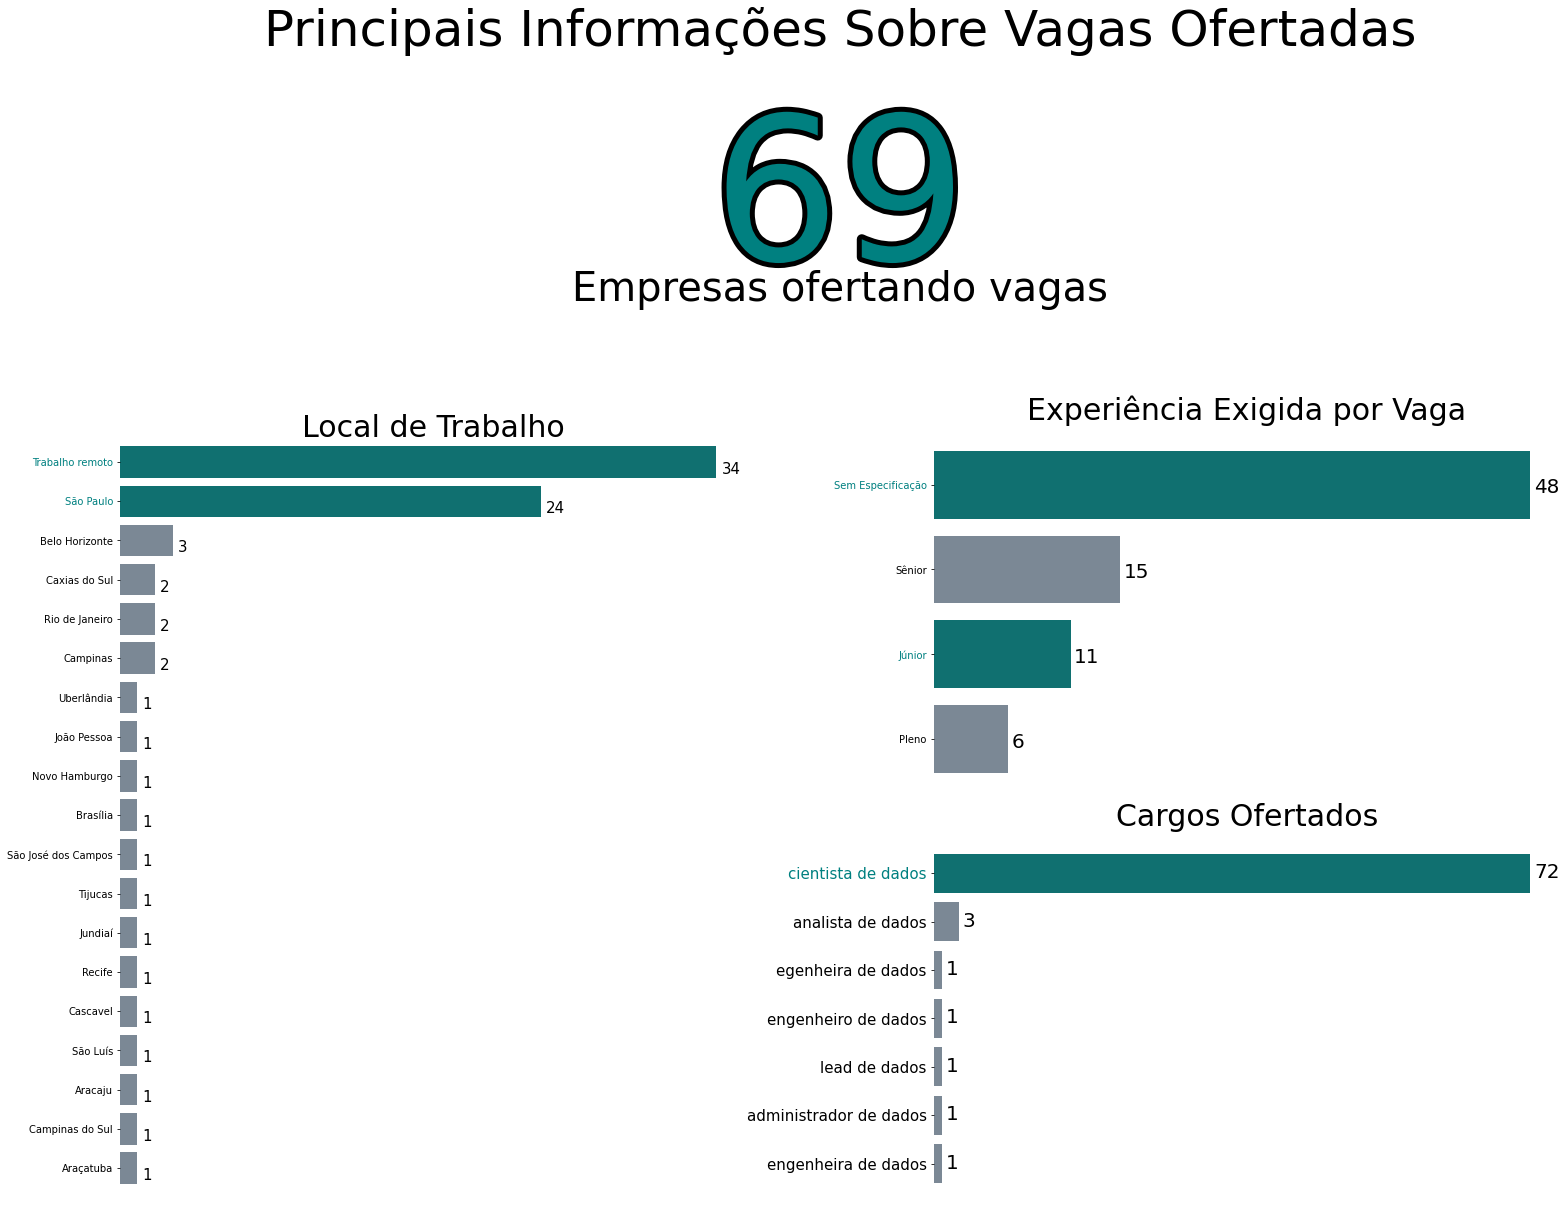

In [26]:
# -------------------- Criando Imagem -------------------------------------------
figura = plt.figure(figsize=(25,20))
tamanho = (3,2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.2)
plt.suptitle('Principais Informações Sobre Vagas Ofertadas', fontsize=50, y=0.92)
# --------------------- Posição 1 ----------------------------------------------

  ## Criando ax 
ax1 = plt.subplot2grid(tamanho,(0,0),rowspan=1, colspan=2) 

  ## Texto
text = ax1.text(0.5, 0.5,f'{data_qual.Empresa.nunique()}',ha='center', va='center', size=200, color='teal')
text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='black'), path_effects.Normal()]) # Editando formato
text = ax1.text(0.5, 0.25,'Empresas ofertando vagas', ha='center', va='center', size=40) 

  ## Ajustes
ax1 = spines(ax1,1)

# --------------------- Posição 2 ----------------------------------------------
  ## Criando ax 

ax2 = plt.subplot2grid(tamanho,(1,0),rowspan=2, colspan=1)

  ## Gráfico

cor = cores('top', 2) # Cores das barras
f1 = barra_horizontal(data_qual['Local'].value_counts(), cor) # Figura
f1 = legend_graf(f1,0.3, 0.7, 15)   # Texto Figura


  ## Ajustes
ax2 = spines(ax2,2) # Remover spines
sns.despine(offset=10, left=True) # Distância entre axis x e y 
ax2.set_title('Local de Trabalho', fontsize=30) # Título
ax2.set(xlabel='') # Remover Label de x
achar = indexs(cor, 'teal')
for i in achar:
  plt.gca().get_yticklabels()[i].set_color('teal')

# --------------------- Posição 3 ----------------------------------------------

  ## Criando ax
ax3 = plt.subplot2grid(tamanho,(1,1),rowspan=1, colspan=1)

  ## Gráfico
cor = cores('exp')
f2 = barra_horizontal(data_qual['Experiência'].value_counts(),cor)
f2 = legend_graf(f2,0.3, 0.5, 20)

  ## Ajustes
ax3 = spines(ax3,2)
sns.despine(offset=10, left=True)
ax3.set_title('Experiência Exigida por Vaga', fontsize=30, y=1.05)
ax3.set(xlabel='')

achar = indexs(cor, 'teal')
for i in achar:
  plt.gca().get_yticklabels()[i].set_color('teal')

# --------------------- Posição 4 ----------------------------------------------

  ## Criando ax
ax4 = plt.subplot2grid(tamanho, (2,1))

  ## Gráfico
cor = cores('cargo')
f3 = barra_horizontal(data_qual['Cargo'].value_counts(),cor)
f3 = legend_graf(f3,0.5, 0.5, 20)

  ## Ajustes
ax4 = spines(ax4,2)
sns.despine(offset=10, left=True)
ax4.set_title('Cargos Ofertados', fontsize=30, y=1.05)
ax4.set(xlabel='')
ax4.tick_params(axis='y', labelsize=15)
achar = indexs(cor, 'teal')
for i in achar:
  plt.gca().get_yticklabels()[i].set_color('teal')


# Salvar Imagem
figura.savefig("Figura_1")




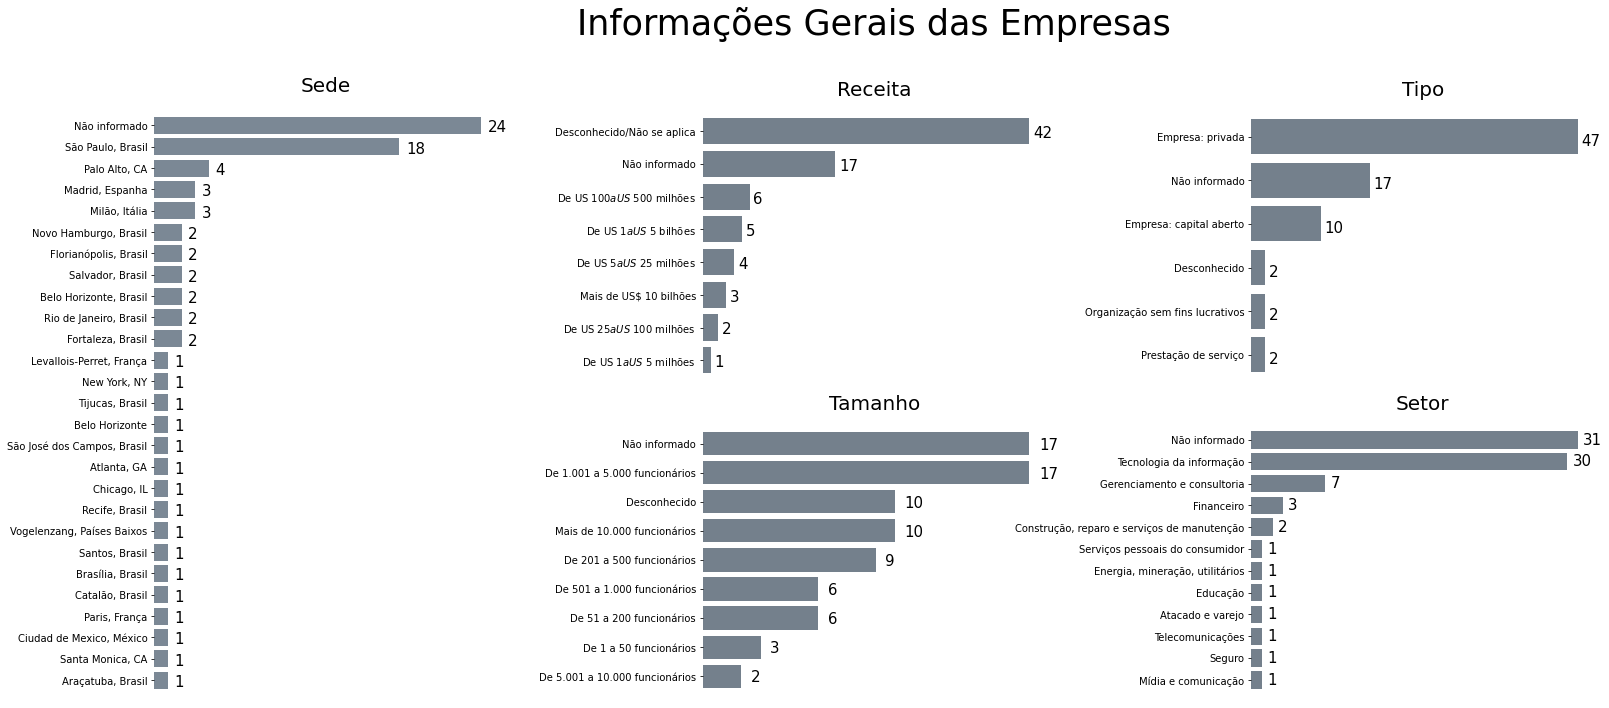

In [27]:
# -------------------- Criando Imagem ----------------------------------------------
figura = plt.figure(figsize=(25,10))
tamanho = (2,3)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.2)

plt.suptitle("Informações Gerais das Empresas", fontsize=35, y=1.05)

# -------------------- Posição 1 ---------------------------------------------------
  ## Axis Gráfico
pos = (0,0)
ax1 = plt.subplot2grid(tamanho,pos, rowspan=2)

  ## Gráfico
cor = ['lightslategray' for i in data_qual['Sede'].unique()]
f1 = barra_horizontal(data_qual['Sede'].value_counts(), cor)
f1 = legend_graf(f1, 0.5, 0.7, 15)
ax1.set_title('Sede', fontsize=20, y=1.03)

  ## Ajustes
ax1 = spines(ax1,2)
ax1.set(xlabel='')
sns.despine(offset=10, left=True)

# -------------------- Posição 2 ---------------------------------------------------
itens = ['Receita','Tipo','Tamanho','Setor']
c=0
for i in range(0,2,1):
  for ii in range(1,3,1):
      ## Axis Gráfico
    pos = (i,ii)
    ax2 = plt.subplot2grid(tamanho,pos)

      ## Gráfico
    dt = data_qual[itens[c]].value_counts()
    cor = ['slategray' for i in data_qual[itens[c]].unique()]
    f = barra_horizontal(dt, cor)
    f = legend_graf(f, 0.5, 0.6, 15)
    ax2.set_title(f'{itens[c]}', fontsize=20, y=1.05)
    c += 1
      ## Ajustes
    ax2 = spines(ax2,2)
    ax2.set(xlabel='')
    sns.despine(offset=10, left=True)


# Salvar Imagem 

figura.savefig("Figura_2")


#### Quantitativos

In [28]:
data_quan =  dataset[quantitativos]
data_quan.head(10)

,Cultura e valores,Oportunidades de carreira,Recomendam para outras pessoas,Alta liderança,Fundação,Qualidade de vida,Nota,Remuneração e benefícios
0,3.2,3.1,73.0,3.1,NaN,3.5,3.8,3.5
1,4.4,4.0,90.0,3.8,1911.0,3.9,4.3,3.8
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.4,3.0,66.0,3.0,2008.0,3.1,3.7,3.3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN
7,4.0,3.9,84.0,3.7,2003.0,3.6,4.0,3.6
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.6,3.2,78.0,3.3,NaN,3.5,3.8,3.6


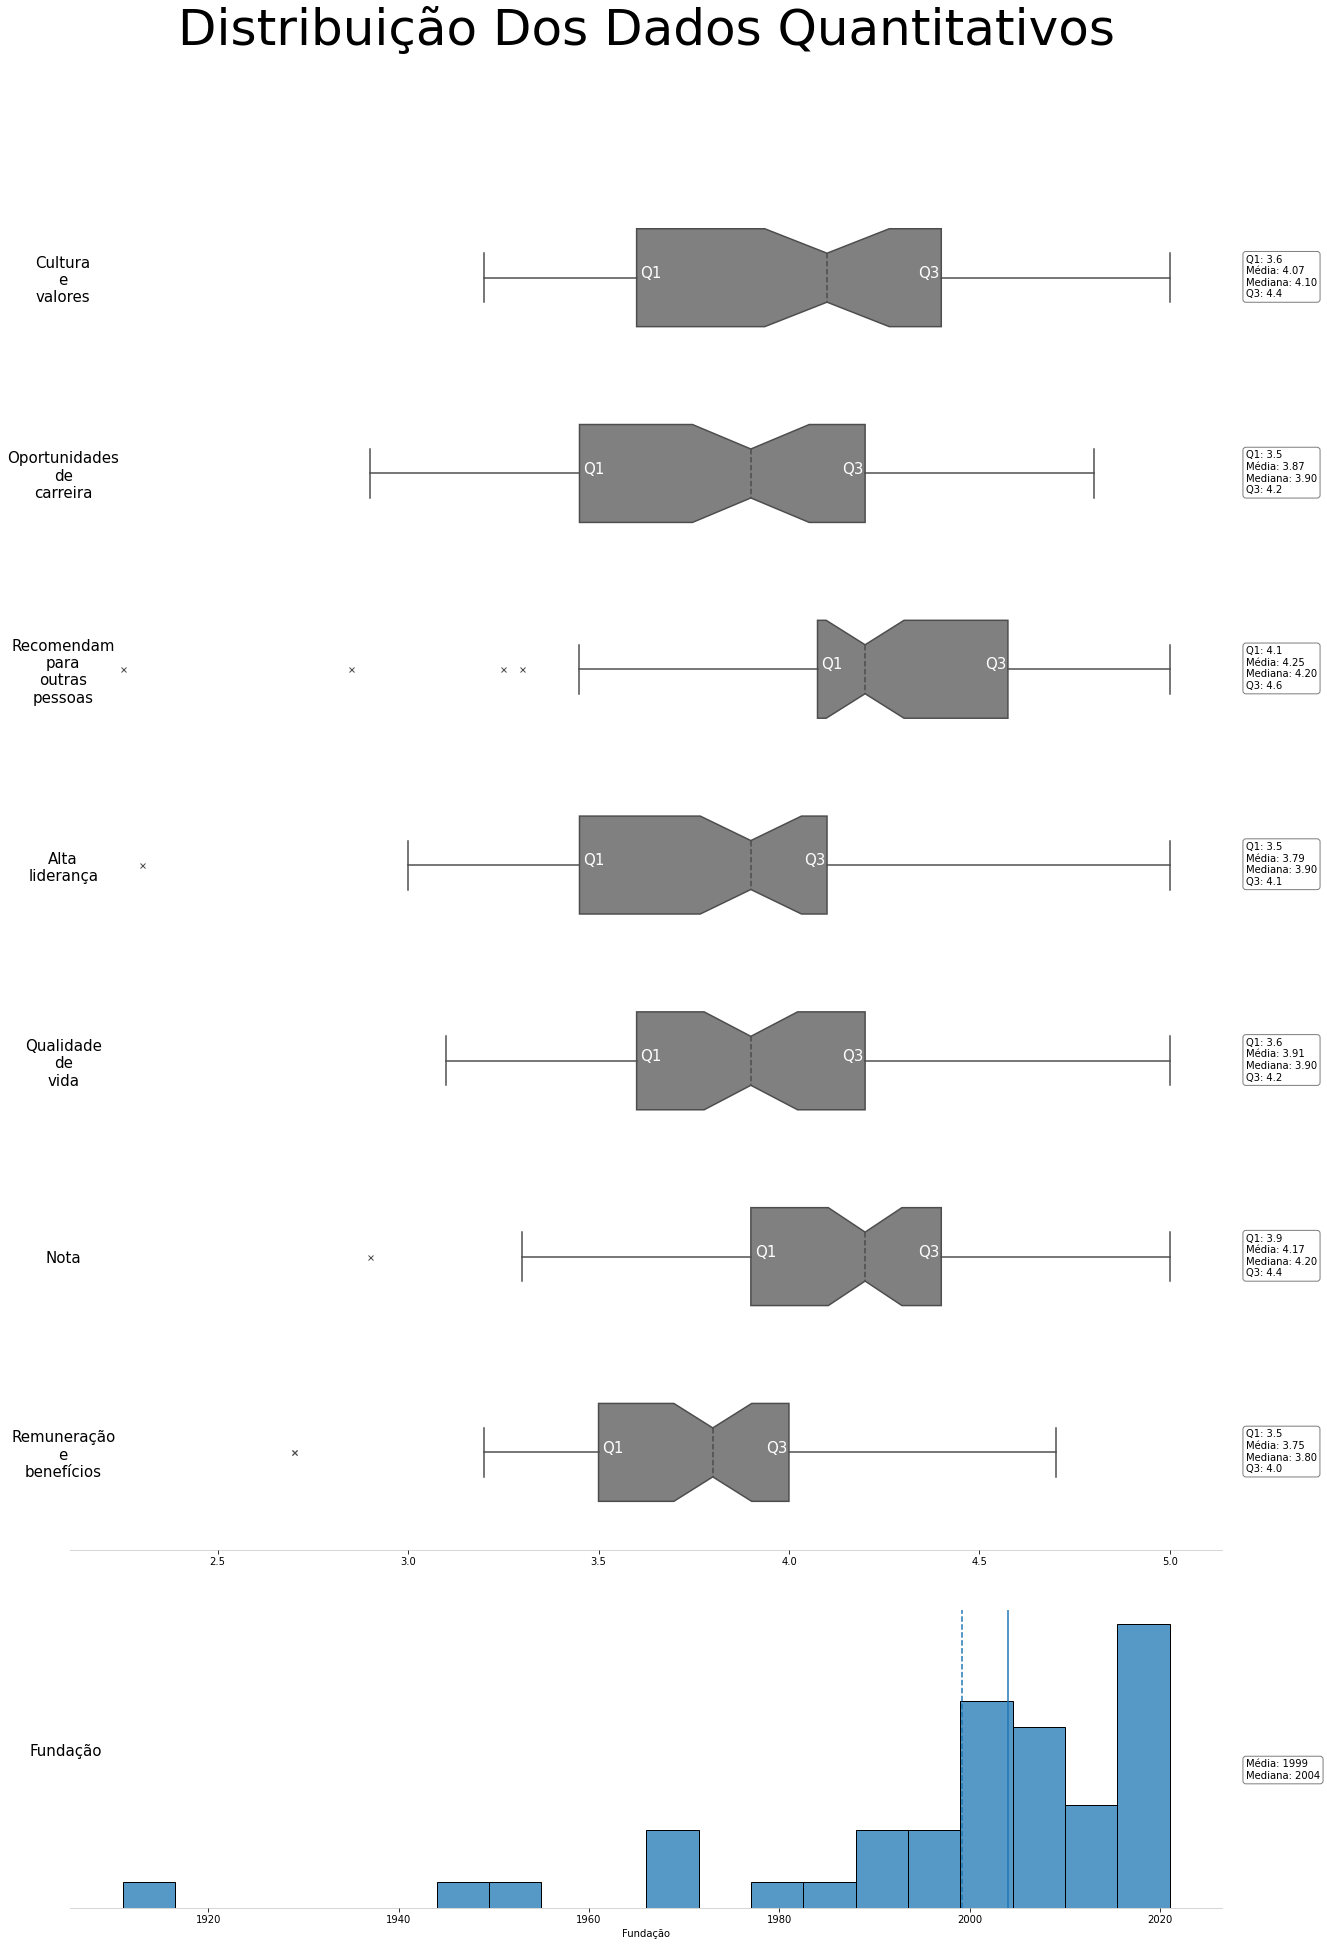

In [29]:
# -------------------- Criando Imagem ------------------------------------------
figura = plt.figure(figsize=(20,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.2)
tamanho = (5,1)
figura.suptitle('Distribuição Dos Dados Quantitativos', fontsize=50)
box = dict(boxstyle='round', facecolor='white', alpha=0.5)
# -------------------- Posição 1 -----------------------------------------------
  ## Axis Gráfico
pos = (0,0)
ax1 = plt.subplot2grid(tamanho,pos, rowspan=4)

  ## Gráfico
dt = data_quan.drop(['Fundação'], axis=1)
dt['Recomendam para outras pessoas'] = data_quan['Recomendam para outras pessoas'].apply(lambda x: (5*x)/100) # Função para sair da escala de 0 a 100 para 0 a 5
f1 = sns.boxplot(data=dt, orient='h', palette=['gray'], width=0.5,flierprops={"marker": "x"}, medianprops={"linestyle":"--"} , autorange=True,notch=True, showcaps=True)

  ## Ajustes
for i,n in zip(dt,range(dt.shape[1])): # Adicionar no gráficos infos e box com infos.
  Q1,Q3 = dt[i].quantile([0.25,0.75]).values
  texto = f'Q1: {Q1:.1f}\nMédia: {dt[i].mean():.2f}\nMediana: {dt[i].median():.2f}\nQ3: {Q3:.1f}'
  plt.text(5.2, n+0.1, texto, bbox=box)
  plt.text(Q1+0.01, n, 'Q1', fontsize=15, color='white')
  plt.text(Q3-0.06, n, 'Q3', fontsize=15, color='white')
ax1 = spines(ax1, 3) # Aplicar na função.
ax1.spines['bottom'].set_alpha(0.2)
ax1.tick_params(axis='y', labelsize=15, left=False)
ticks = [i.replace(' ','\n') for i in dt.columns]
ax1.set_yticklabels(ticks, horizontalalignment='center');

# -------------------- Posição 2 -----------------------------------------------
  ## Axis Gráfico
pos = (4,0)
ax2 = plt.subplot2grid(tamanho, pos)

  ## Gráfico
f2 = sns.histplot(data=data_quan['Fundação'], bins=20)

  ## Ajustes
ax2 = spines(ax2, 3)
ax2.spines['bottom'].set_alpha(0.2)
ax2.tick_params(axis='y', labelsize=15, left=False,labelleft = False)
plt.axvline(data_quan['Fundação'].mean(), linestyle='--')
plt.axvline(data_quan['Fundação'].median())
plt.ylabel("Fundação", rotation=0, fontsize=15)
texto = f'Média: {data_quan["Fundação"].mean():.0f} \nMediana: {data_quan["Fundação"].median():.0f}'
ax2.text(2029, 5, texto, bbox=box)



# Salvar Im60agem
figura.savefig("Figura_3")

## Resultados

### Análise para oferta de trabalho remoto

In [30]:
# ----- Montar dataset para análise
def trabalho_remoto(dt):
  """
  Como o foco é a análise das ofertas de trabalho remoto, vai ser necessário montar um dataset
  filtrando as informações desejadas, sendo eles:
  """
  n_dt = dt.loc[(dt['Local'] == 'Trabalho remoto') & (dt['Cargo'] == 'cientista de dados')]
  return n_dt.reset_index(drop=True)


In [31]:
exp_a1 = trabalho_remoto(dataset)
exp_a1.head(3)

,Empresa,Vaga,Local,Nota,Link,Descrição,Tamanho,Tipo,Receita,Oportunidades de carreira,Remuneração e benefícios,Cultura e valores,Alta liderança,Qualidade de vida,Recomendam para outras pessoas,Sede,Fundação,Setor,Cargo,Experiência
0,BIP Brasil,Pessoa Cientista de Dados Pleno - Varejista de...,Trabalho remoto,4.0,https://www.glassdoor.com.br/partner/jobListin...,Já conhece a Bip?\nO nosso propósito é provoca...,De 1.001 a 5.000 funcionários,Empresa: privada,De US$ 100 a US$ 500 milhões,3.9,3.6,4.0,3.7,3.6,84.0,"Milão, Itália",2003.0,Gerenciamento e consultoria,cientista de dados,Pleno
1,Eng4tech,Cientista de Dados (Data Scientist),Trabalho remoto,NaN,https://www.glassdoor.com.br/partner/jobListin...,"Na ENG4TECH, trabalhamos com soluções inovador...",Não informado,Não informado,Não informado,NaN,NaN,NaN,NaN,NaN,NaN,Não informado,NaN,Não informado,cientista de dados,Sem Especificação
2,Fretebras,Cientista de Dados Jr,Trabalho remoto,4.1,https://www.glassdoor.com.br/partner/jobListin...,#VemSerFrete\nA Fretebras é a pioneira e a mai...,De 1.001 a 5.000 funcionários,Empresa: privada,Desconhecido/Não se aplica,3.8,4.4,4.1,3.7,4.2,79.0,"Catalão, Brasil",2008.0,Tecnologia da informação,cientista de dados,Júnior


In [32]:
!pip install mycolorpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3873 sha256=f1b4f2523d230c1d9bb6fc2d8c6d9cea93f7e8196b17262ba7c44575678efbff
  Stored in directory: /root/.cache/pip/wheels/e6/a2/70/8113826487ef774503bcd38963b04b4c920deef45d7d54993e
Successfully built mycolorpy


In [33]:
from mycolorpy import colorlist as mcp
import matplotlib.patches as mpatches


In [34]:
def cores(dta):
  size = dta.shape[0]
  k = size * 4
  color = mcp.gen_color(cmap = "winter",n = k)
  ko = int(k/2)
  kf = ko+size
  colors = color[ko:kf]
  return colors

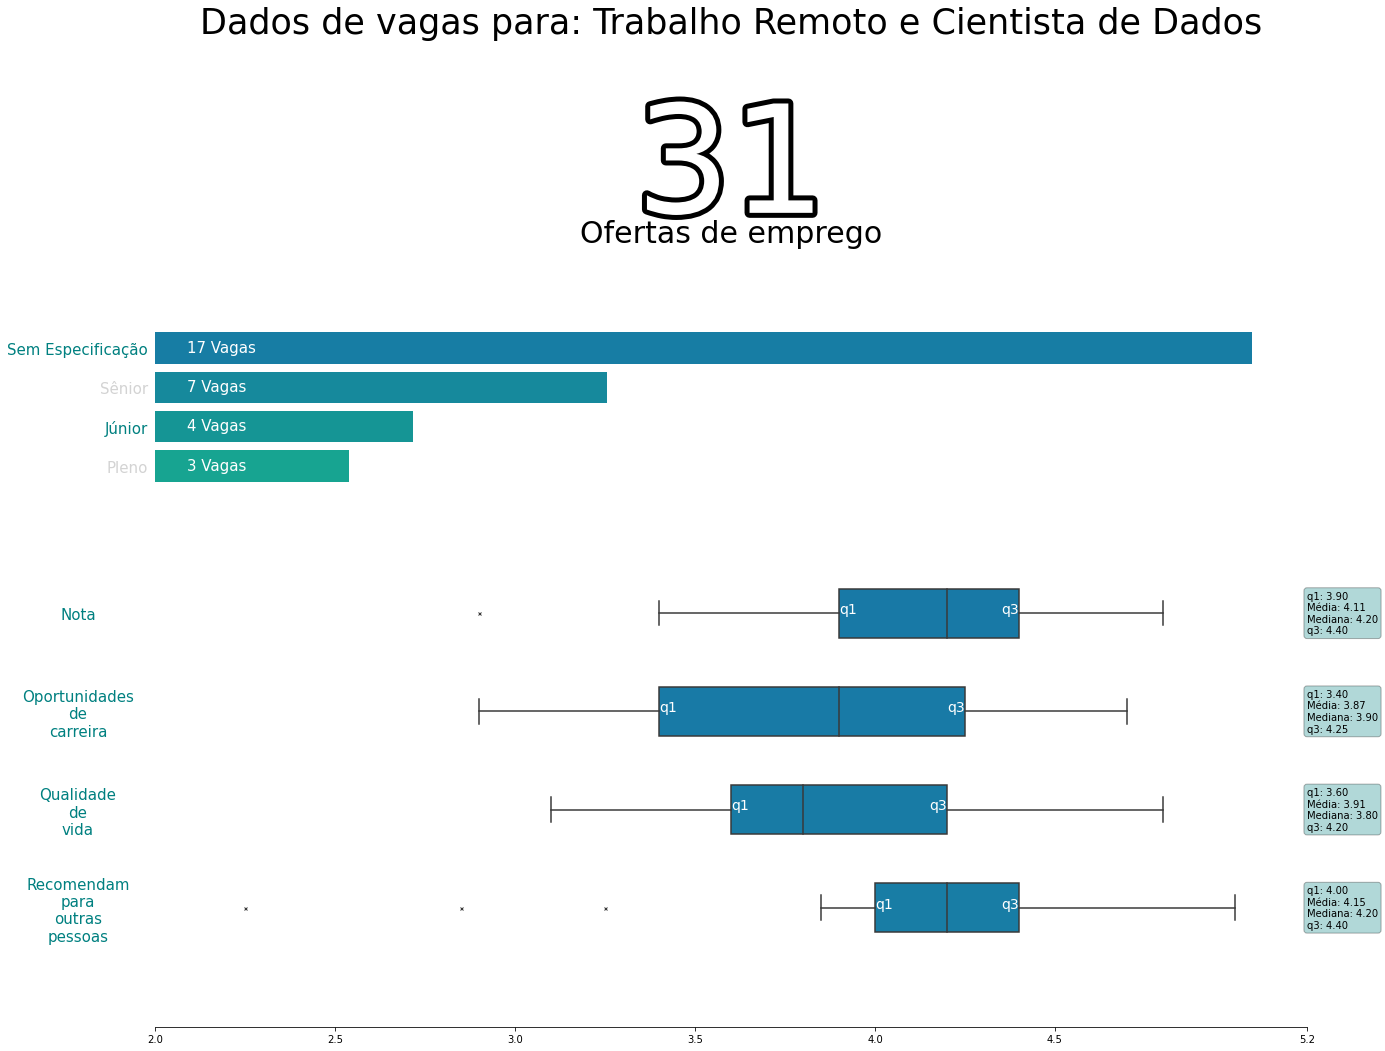

In [107]:
# --------------------------- Figura -------------------------------------------
figura = plt.figure(figsize=(20,15))
tamanho = (4,1)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    hspace=0.5)
box = dict(boxstyle='round', alpha=0.3, facecolor='teal')
plt.suptitle("Dados de vagas para: Trabalho Remoto e Cientista de Dados", fontsize=35)
# --------------------------- Posição 1 ----------------------------------------
  ## Axis Gráfico
pos = (0,0)
ax1 = plt.subplot2grid(tamanho, pos)

  ## Texto
text = ax1.text(0.5, 0.5,f'{exp_a1.shape[0]}',
                ha='center', va='center', size=150, color='white')

text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='black'),
                       path_effects.Normal()])
text = ax1.text(0.5, 0.10,'Ofertas de emprego',
                ha='center', va='center', size=30)

ax1 = spines(ax1, 1)

# --------------------------- Posição 2 ----------------------------------------
  ## Axis Gráfico
pos = (1,0)
ax2 = plt.subplot2grid(tamanho, pos)

  ## Gráfico
dt = exp_a1['Experiência'].value_counts()
cor = cores(dt)
fig = sns.barplot(orient='h',
                  x= dt,
                  y = dt.index,
                  palette=cor
                  )
for i in fig.patches:
  x = i.get_width()
  y = i.get_xy()[1]
  plt.annotate(f'{int(x)} Vagas', xy = (0.5, y + 0.5), fontsize=15, color='white')

  ## Ajustes
ax2.tick_params(axis='y', labelsize=15, left=False)
ax2 = spines(ax2, 2)
ax2.set(xlabel='')
for i in [0,2]:
  plt.gca().get_yticklabels()[i].set_color('teal')
for i in [1,3]:
  plt.gca().get_yticklabels()[i].set_color('lightgrey')
# --------------------------- Posição 3 ----------------------------------------
  ## Axis Gráfico
pos = (2,0)
ax3 = plt.subplot2grid(tamanho, pos, rowspan=2)

  ## Gráfico
dt = exp_a1.copy()
dt['Recomendam para outras pessoas'] = dt['Recomendam para outras pessoas'].apply( lambda x: ((5*x)/100))
cor = cores(dt)
dt.columns = [i.replace(' ','\n') for i in dt.columns]
fig = sns.boxplot(data=dt.iloc[:,[3, 9,13,14]], orient='h', palette = cor, width=0.5, fliersize=3, linewidth=None, flierprops={"marker": "x"}, notch=False) 


  ## Ajustes
sns.despine(ax= ax3, offset=70)
ax3.tick_params(axis='y', labelsize=15, left=False)
ax3.set_yticklabels(dt.iloc[:,[3, 9,13,14]].columns, horizontalalignment='center');
fig.spines['left'].set_visible(False)
ax3.set_xticks([2, 2.5, 3, 3.5, 4, 4.5, 5.2]);
jdt = dt.iloc[:,[3, 9,13,14]]

for xi in range(4): # Função para adicionar BOXs de legenda
  media = jdt.iloc[:,xi].mean()
  mediana = jdt.iloc[:,xi].median()
  q1, q3 = jdt.iloc[:,xi].quantile([0.25,0.75]).values
  texty = f'q1: {q1:.2f}\nMédia: {media:.2f}\nMediana: {mediana:.2f}\nq3: {q3:.2f}'
  ax3.text(5.2, xi, texty, bbox=box, verticalalignment='center', horizontalalignment='left')
  ax3.text(q1,xi,'q1', fontsize=14, color='white')
  ax3.text(q3-0.05,xi,'q3', fontsize=14, color='white')

for i in range(4):
  plt.gca().get_yticklabels()[i].set_color('teal')
# --------------------------- Salvar Imagem ------------------------------------

figura.savefig('Trabalho Remoto')

In [36]:
m1 = exp_a1['Nota'].median()
m2 = exp_a1['Oportunidades de carreira'].median()
m3 = exp_a1['Qualidade de vida'].median()
m4 = exp_a1['Recomendam para outras pessoas'].mean()

exp_a2 = exp_a1.loc[exp_a1['Experiência'].isin(['Sem Especificação','Júnior'])].reset_index(drop=True)

dt_2 = exp_a2.loc[:,['Empresa','Nota','Oportunidades de carreira','Qualidade de vida','Recomendam para outras pessoas']].copy()
dt_2 = dt_2.set_index('Empresa')
dt_2 = dt_2.sort_values(by='Recomendam para outras pessoas',ascending=False) 

In [105]:
exp_a2.head(3)

,Empresa,Vaga,Local,Nota,Link,Descrição,Tamanho,Tipo,Receita,Oportunidades de carreira,Remuneração e benefícios,Cultura e valores,Alta liderança,Qualidade de vida,Recomendam para outras pessoas,Sede,Fundação,Setor,Cargo,Experiência
0,eng4tech,Cientista de Dados (Data Scientist),Trabalho remoto,NaN,https://www.glassdoor.com.br/partner/jobListin...,"Na ENG4TECH, trabalhamos com soluções inovador...",Não informado,Não informado,Não informado,NaN,NaN,NaN,NaN,NaN,NaN,Não informado,NaN,Não informado,cientista de dados,Sem Especificação
1,fretebras,Cientista de Dados Jr,Trabalho remoto,4.1,https://www.glassdoor.com.br/partner/jobListin...,#VemSerFrete\nA Fretebras é a pioneira e a mai...,De 1.001 a 5.000 funcionários,Empresa: privada,Desconhecido/Não se aplica,3.8,4.4,4.1,3.7,4.2,79.0,"Catalão, Brasil",2008.0,Tecnologia da informação,cientista de dados,Júnior
2,instituto atlântico,Cientista de Dados Júnior (Remoto) - 27658-316...,Trabalho remoto,4.6,https://www.glassdoor.com.br/partner/jobListin...,"Olá, somos um Instituto de Pesquisa e Desenvol...",De 501 a 1.000 funcionários,Organização sem fins lucrativos,Desconhecido/Não se aplica,4.5,4.3,4.8,4.4,4.7,98.0,"Fortaleza, Brasil",2001.0,Tecnologia da informação,cientista de dados,Júnior


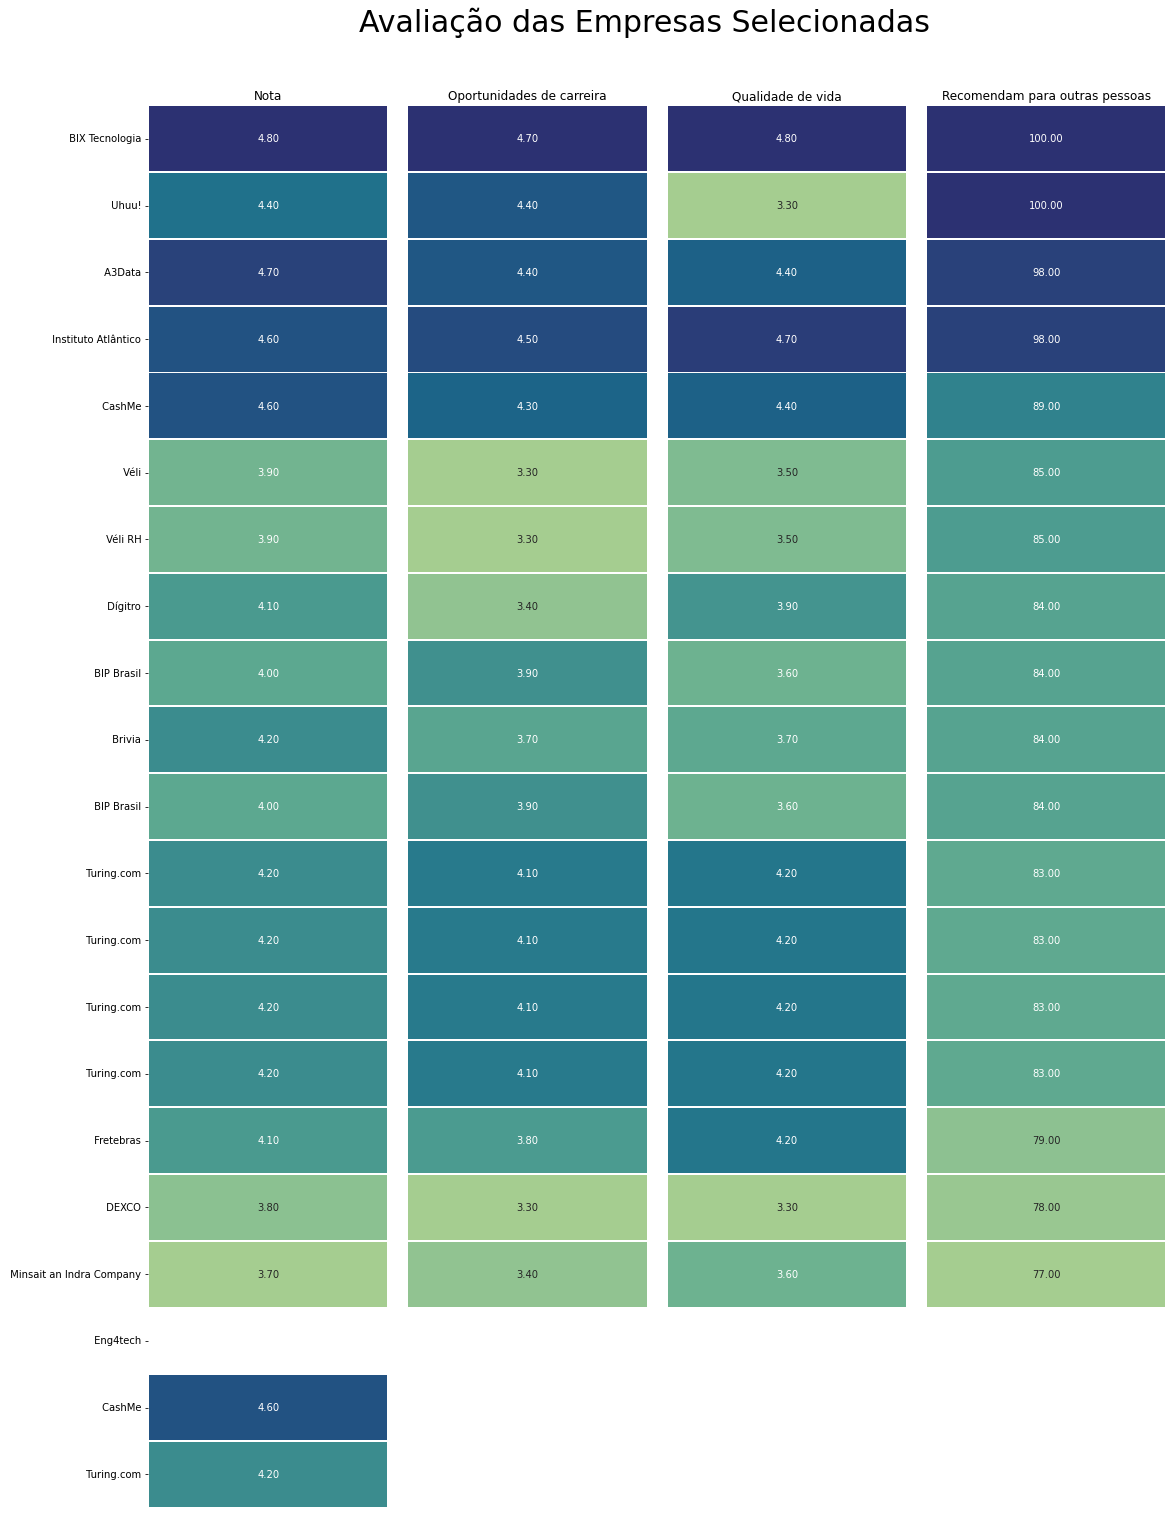

In [106]:
figura = plt.figure(figsize=(20,20))
plt.suptitle("Avaliação das Empresas Selecionadas", y=1.05, fontsize=30, x= 0.45)
tamanho = (1,5)
c = 0
Ent = True
for i in range(4):
  ax1 = plt.subplot2grid(tamanho, (0,i))
  fig = sns.heatmap(dt_2.iloc[:,i:i+1], annot=True,  linewidth=.9, cmap="crest", cbar=False, yticklabels=Ent, fmt='.2f', xticklabels=False)
  plt.title(f'{dt_2.iloc[:,i].name}')
  c +=1
  if c > 0:
    Ent=False
  fig.set(ylabel='', xlabel='')
plt.tight_layout()

figura.savefig("Heat map")

O objetivo inicial era poder selecionar 3 empresas que apresentam melhor rankeadas com as ofertas de vagas, mas como o estudo foi obtido 4, sendo: BIP Brasil, A3data, Instituto Atlântico e Cashme.

Agora com as empresas selecionadas, pode-se ser feito uma análise das vagas 

In [113]:
exp_a2.head()

,Empresa,Vaga,Local,Nota,Link,Descrição,Tamanho,Tipo,Receita,Oportunidades de carreira,Remuneração e benefícios,Cultura e valores,Alta liderança,Qualidade de vida,Recomendam para outras pessoas,Sede,Fundação,Setor,Cargo,Experiência
0,eng4tech,Cientista de Dados (Data Scientist),Trabalho remoto,NaN,https://www.glassdoor.com.br/partner/jobListin...,"Na ENG4TECH, trabalhamos com soluções inovador...",Não informado,Não informado,Não informado,NaN,NaN,NaN,NaN,NaN,NaN,Não informado,NaN,Não informado,cientista de dados,Sem Especificação
1,fretebras,Cientista de Dados Jr,Trabalho remoto,4.1,https://www.glassdoor.com.br/partner/jobListin...,#VemSerFrete\nA Fretebras é a pioneira e a mai...,De 1.001 a 5.000 funcionários,Empresa: privada,Desconhecido/Não se aplica,3.8,4.4,4.1,3.7,4.2,79.0,"Catalão, Brasil",2008.0,Tecnologia da informação,cientista de dados,Júnior
2,instituto atlântico,Cientista de Dados Júnior (Remoto) - 27658-316...,Trabalho remoto,4.6,https://www.glassdoor.com.br/partner/jobListin...,"Olá, somos um Instituto de Pesquisa e Desenvol...",De 501 a 1.000 funcionários,Organização sem fins lucrativos,Desconhecido/Não se aplica,4.5,4.3,4.8,4.4,4.7,98.0,"Fortaleza, Brasil",2001.0,Tecnologia da informação,cientista de dados,Júnior
3,bix tecnologia,Cientista de Dados - Junior (Remoto),Trabalho remoto,4.8,https://www.glassdoor.com.br/partner/jobListin...,"Somos uma empresa apaixonada por pessoas, paut...",Desconhecido,Empresa: privada,Desconhecido/Não se aplica,4.7,4.0,4.9,4.7,4.8,100.0,Não informado,NaN,Não informado,cientista de dados,Júnior
4,turing.com,Cientista de Dados (Python),Trabalho remoto,4.2,https://www.glassdoor.com.br/partner/jobListin...,Sobre a Turing.com: A Turing tem sua matriz em...,De 1.001 a 5.000 funcionários,Empresa: privada,Desconhecido/Não se aplica,4.1,4.0,4.1,4.0,4.2,83.0,"Palo Alto, CA",2018.0,Tecnologia da informação,cientista de dados,Sem Especificação


In [40]:
exp_a2['Empresa'] = exp_a2['Empresa'].str.strip().str.lower()

In [41]:
data_analise = exp_a2.loc[exp_a2['Empresa'].isin(['bix tecnologia','a3data','cashme','instituto atlântico'])].reset_index(drop=True)
data_analise.head()

,Empresa,Vaga,Local,Nota,Link,Descrição,Tamanho,Tipo,Receita,Oportunidades de carreira,Remuneração e benefícios,Cultura e valores,Alta liderança,Qualidade de vida,Recomendam para outras pessoas,Sede,Fundação,Setor,Cargo,Experiência
0,instituto atlântico,Cientista de Dados Júnior (Remoto) - 27658-316...,Trabalho remoto,4.6,https://www.glassdoor.com.br/partner/jobListin...,"Olá, somos um Instituto de Pesquisa e Desenvol...",De 501 a 1.000 funcionários,Organização sem fins lucrativos,Desconhecido/Não se aplica,4.5,4.3,4.8,4.4,4.7,98.0,"Fortaleza, Brasil",2001.0,Tecnologia da informação,cientista de dados,Júnior
1,bix tecnologia,Cientista de Dados - Junior (Remoto),Trabalho remoto,4.8,https://www.glassdoor.com.br/partner/jobListin...,"Somos uma empresa apaixonada por pessoas, paut...",Desconhecido,Empresa: privada,Desconhecido/Não se aplica,4.7,4.0,4.9,4.7,4.8,100.0,Não informado,NaN,Não informado,cientista de dados,Júnior
2,a3data,Cientista de Dados,Trabalho remoto,4.7,https://www.glassdoor.com.br/partner/jobListin...,A A3Data é uma consultoria referência em #Dado...,De 51 a 200 funcionários,Empresa: privada,Desconhecido/Não se aplica,4.4,3.7,4.8,4.7,4.4,98.0,"Belo Horizonte, Brasil",2014.0,Tecnologia da informação,cientista de dados,Sem Especificação
3,cashme,Cientista de Dados,Trabalho remoto,4.6,https://www.glassdoor.com.br/partner/jobListin...,Ser impulso. Essa é a força que nos move.\nVie...,De 201 a 500 funcionários,Empresa: privada,Desconhecido/Não se aplica,4.3,3.9,4.6,4.4,4.4,89.0,"São Paulo, Brasil",2018.0,Financeiro,cientista de dados,Sem Especificação
4,cashme,Cientista de Dados,Trabalho remoto,4.6,https://www.glassdoor.com.br/partner/jobListin...,Ser impulso. Essa é a força que nos move.\nVie...,Não informado,Não informado,Não informado,NaN,NaN,NaN,NaN,NaN,NaN,Não informado,NaN,Não informado,cientista de dados,Sem Especificação


In [42]:
data_analise = data_analise.drop(4, axis=0)

In [43]:
data_analise['Descrição'] = data_analise['Descrição'].str.replace('\n','_')

In [44]:
def coleta(n):
  " Função criada para coletar, através do uso do ReGex, as informçãos presentes na proposta de emprego."
  texto = data_analise.loc[n,'Descrição']
  p = re.compile(r'(?<=qualificações)(.*)(?=Informações adicionais)')
  r = p.finditer(texto)
  for i in r:
    tex = i.group(1)
  tex = tex.replace('_','\n')
  return tex

def criar_string(dt0):
  " Função criada para coletar dados presentes no dataset."
  string='\n'
  for ii in range(dt0.shape[0]): # Loop para montar uma string com as informações presentes no dataset.
    string = string + str(dt0.index[ii]) +': ' + str(dt0[ii]) +'\n'

  return string

In [45]:
data_analise

,Empresa,Vaga,Local,Nota,Link,Descrição,Tamanho,Tipo,Receita,Oportunidades de carreira,Remuneração e benefícios,Cultura e valores,Alta liderança,Qualidade de vida,Recomendam para outras pessoas,Sede,Fundação,Setor,Cargo,Experiência
0,instituto atlântico,Cientista de Dados Júnior (Remoto) - 27658-316...,Trabalho remoto,4.6,https://www.glassdoor.com.br/partner/jobListin...,"Olá, somos um Instituto de Pesquisa e Desenvol...",De 501 a 1.000 funcionários,Organização sem fins lucrativos,Desconhecido/Não se aplica,4.5,4.3,4.8,4.4,4.7,98.0,"Fortaleza, Brasil",2001.0,Tecnologia da informação,cientista de dados,Júnior
1,bix tecnologia,Cientista de Dados - Junior (Remoto),Trabalho remoto,4.8,https://www.glassdoor.com.br/partner/jobListin...,"Somos uma empresa apaixonada por pessoas, paut...",Desconhecido,Empresa: privada,Desconhecido/Não se aplica,4.7,4.0,4.9,4.7,4.8,100.0,Não informado,NaN,Não informado,cientista de dados,Júnior
2,a3data,Cientista de Dados,Trabalho remoto,4.7,https://www.glassdoor.com.br/partner/jobListin...,A A3Data é uma consultoria referência em #Dado...,De 51 a 200 funcionários,Empresa: privada,Desconhecido/Não se aplica,4.4,3.7,4.8,4.7,4.4,98.0,"Belo Horizonte, Brasil",2014.0,Tecnologia da informação,cientista de dados,Sem Especificação
3,cashme,Cientista de Dados,Trabalho remoto,4.6,https://www.glassdoor.com.br/partner/jobListin...,Ser impulso. Essa é a força que nos move._Viem...,De 201 a 500 funcionários,Empresa: privada,Desconhecido/Não se aplica,4.3,3.9,4.6,4.4,4.4,89.0,"São Paulo, Brasil",2018.0,Financeiro,cientista de dados,Sem Especificação


In [59]:
def relatorio(i):
# ----------------------------------- Configuração de Imagem 
  fig = plt.figure(figsize=(24,16))
  tamanho = (2,3)
  empresa = data_analise.loc[i,"Empresa"].capitalize()
  box = dict(boxstyle='round', facecolor='white', alpha=0.8, pad = 1)
  plt.suptitle(f'Empresa: {empresa}', fontsize=30, weight='bold')


# -----------------------------------============== Posição 1
  ## Axis
  pos = (0,2)
  ax = plt.subplot2grid(tamanho, pos, rowspan=2)
  spines(ax, 1)

  ## Gráfico
  dt_a = data_analise.iloc[i,[0,19,2,6,7,8,15,16,17,18]] # Dados Categóricos.

  string = criar_string(dt_a) # Coleta dos dados

  plt.text(0.5,0.97,
          string, 
          bbox=box, horizontalalignment='center', verticalalignment='top', fontsize=15, style='italic')
  spines(ax, 1)

  dt_an = data_analise.iloc[i,[3,9,10,11,12,13,14, 15]] # Dados Númericos.

  string = criar_string(dt_an) # Coleta dos dados

  plt.text(0.5,0.55,
          string, 
          bbox=box, horizontalalignment='center', verticalalignment='top', fontsize=15, style='italic')

# -----------------------------------=============== Posição 2
    ## Axis
  pos = (1,0)
  ax = plt.subplot2grid(tamanho, pos, colspan=2)
  spines(ax, 1)

  ## Gráfico
  plt.text(0.75,0.4,
          f'Link: {data_analise.loc[i,["Link"]][0]}', 
          bbox=box, horizontalalignment='center', verticalalignment='top', fontsize=8, style='italic');

# -----------------------------------=============== Posição 2
  ## Axis
  pos = (0,0)
  ax = plt.subplot2grid(tamanho, pos, colspan=2)
  spines(ax, 1)

  ## Gráfico
  plt.text(0, 1, coleta(i).replace(';','\n').replace(' ou',' ou\n').replace('(','\n(').replace(' como ',' como\n '), fontsize=14, horizontalalignment='left', verticalalignment='top');

  return fig.savefig(f'relatorio da {empresa}')

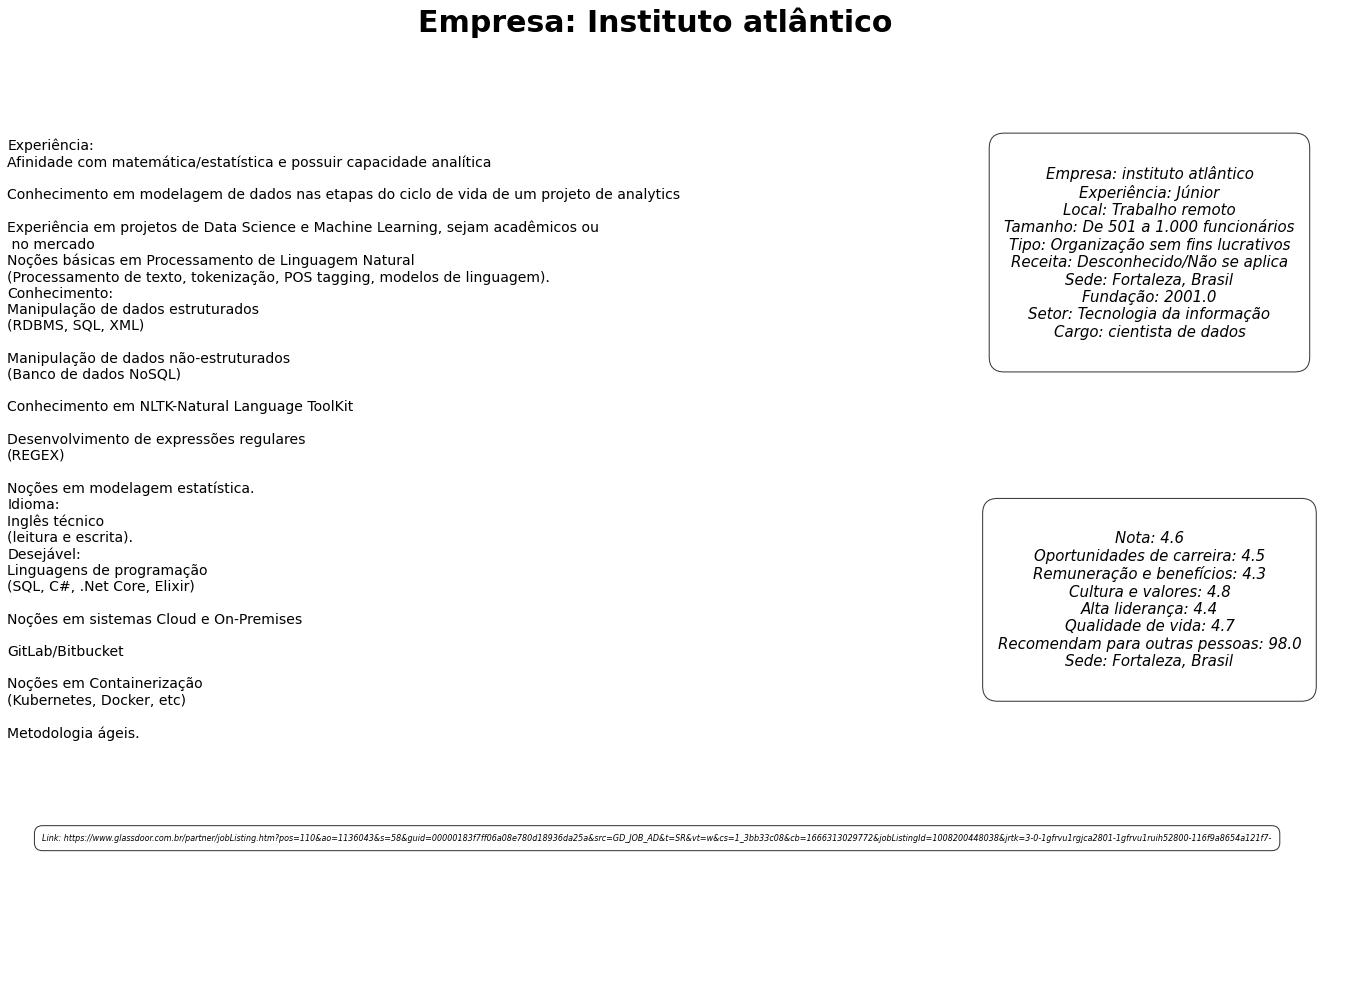

In [108]:
relatorio(0)

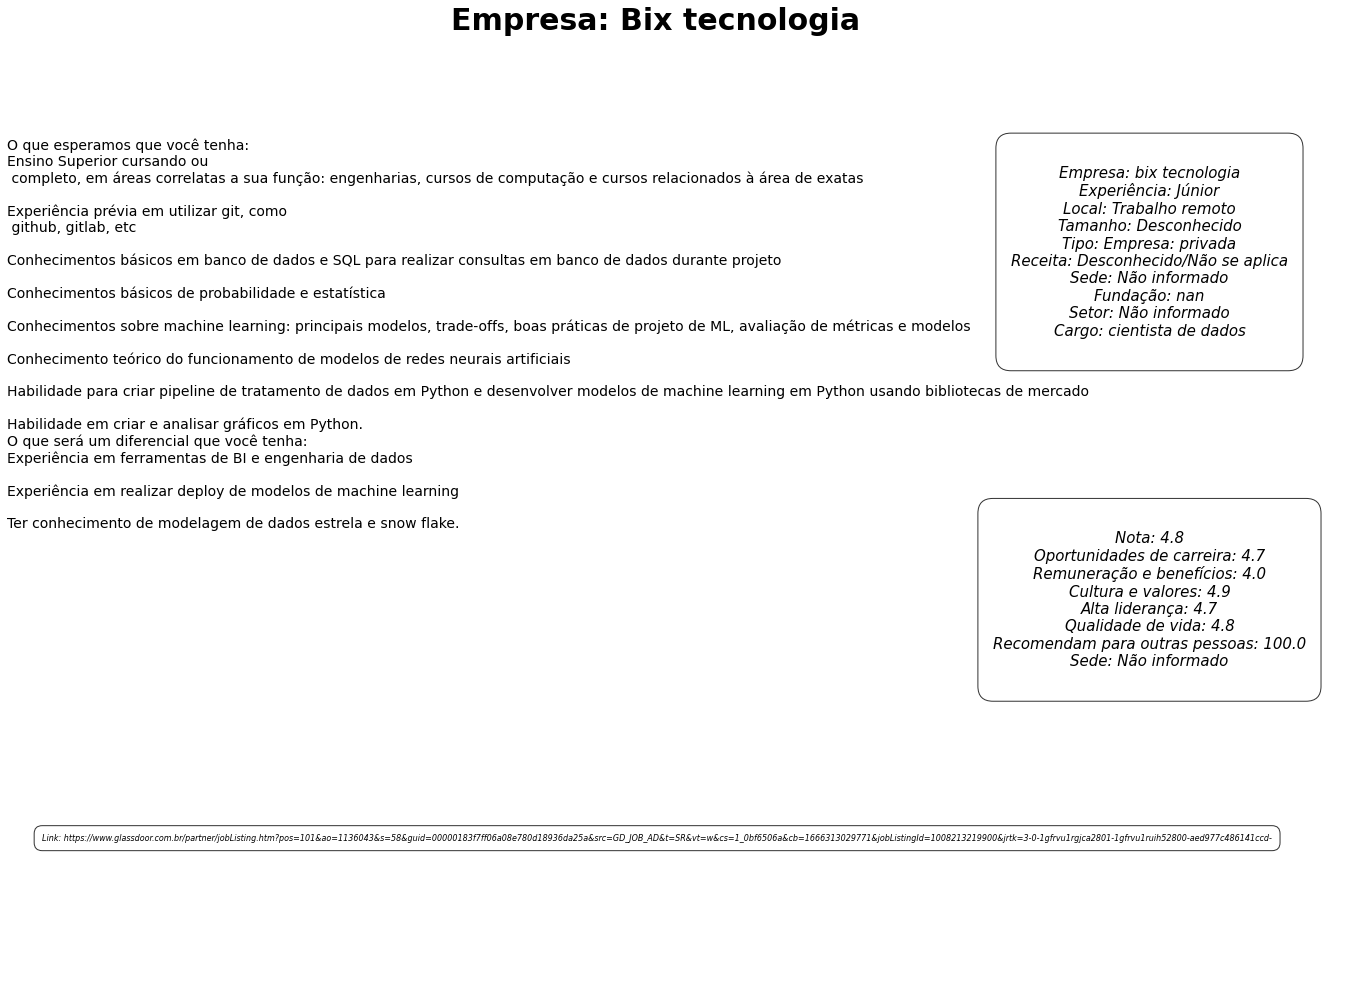

In [109]:
relatorio(1)

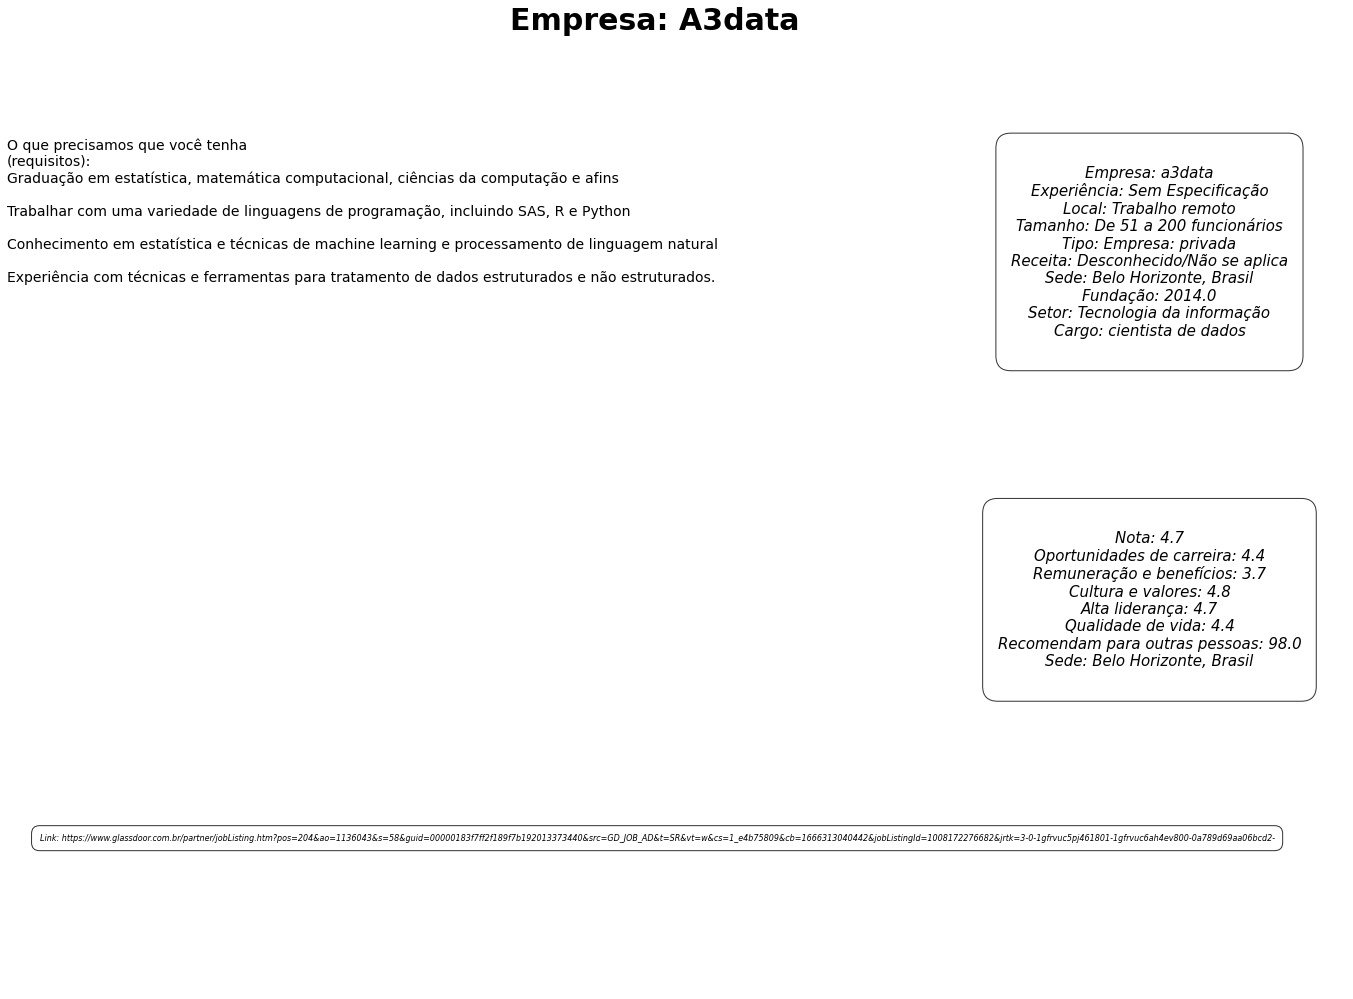

In [110]:
relatorio(2)

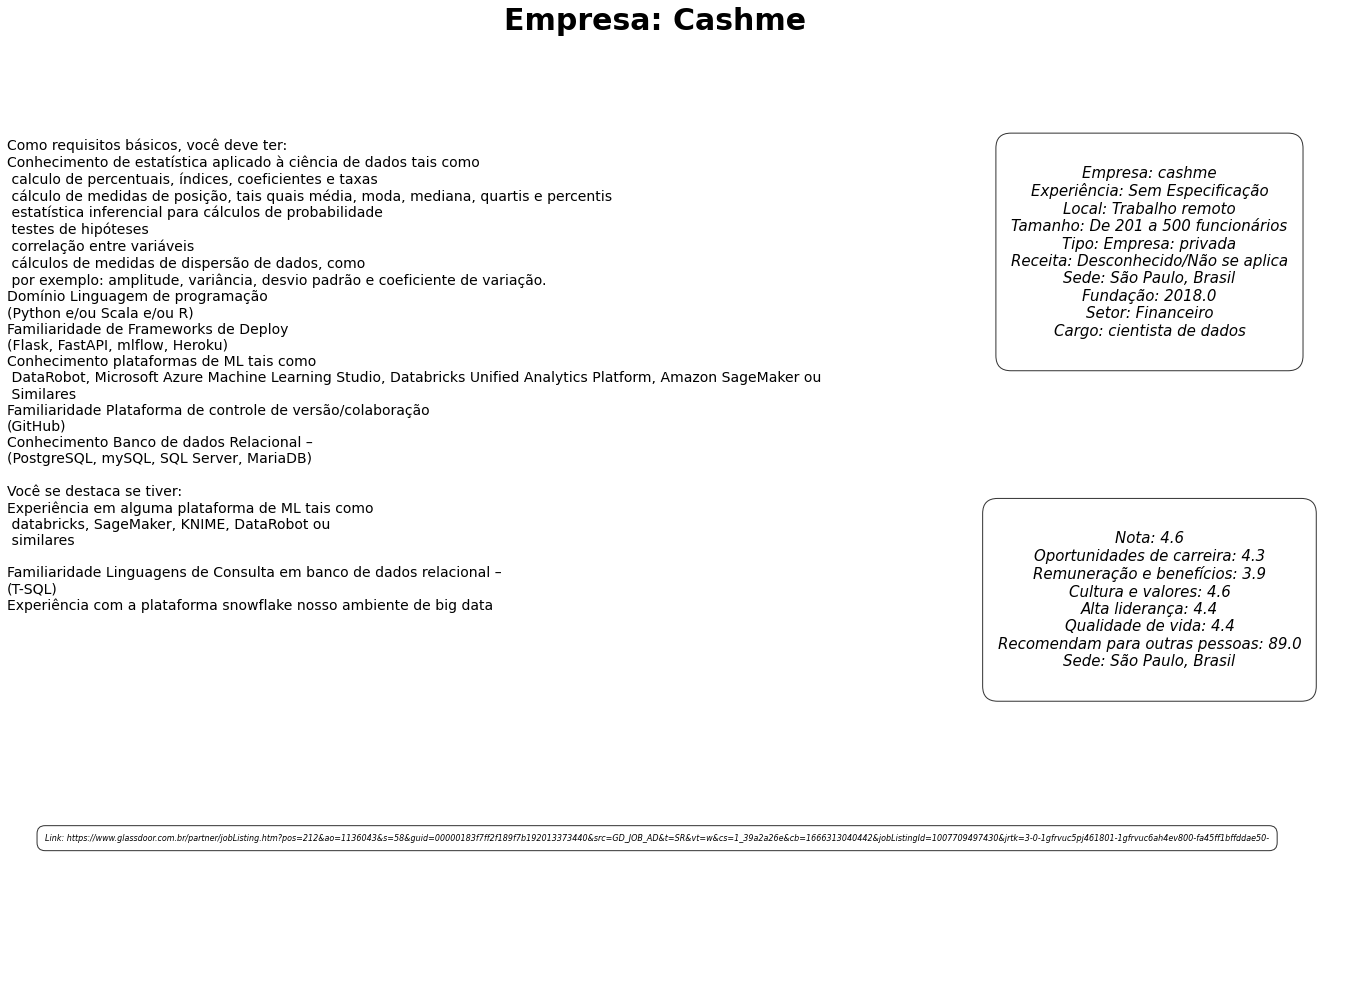

In [111]:
relatorio(3)